<a href="https://colab.research.google.com/github/lokeshreddiee/Task_Completion/blob/main/CMPE_255_GROUP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Hazard Prediction

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [192]:
from sklearn.preprocessing import OneHotEncoder

In [193]:
from sklearn.metrics import balanced_accuracy_score

In [194]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

Reading the data from credit risk dataset

In [195]:
credit_base = pd.read_csv('credit_risk_dataset.csv')

In [196]:
credit_base.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [197]:
credit_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Exploratory data analysis

# Univariate analysis of continuous variables

In [198]:
measures_df = credit_base.select_dtypes(include='number')

In [199]:
measures_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [200]:
measures_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [201]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

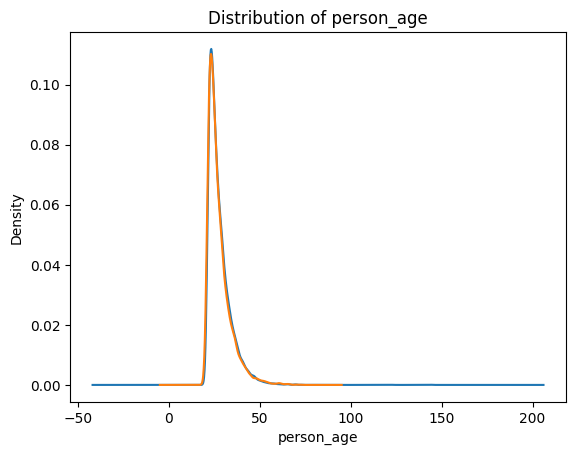

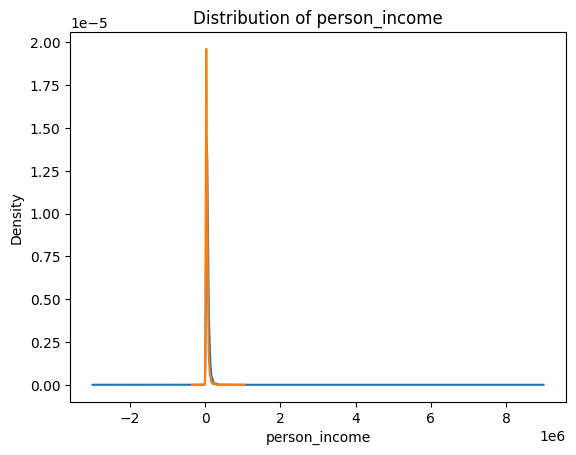

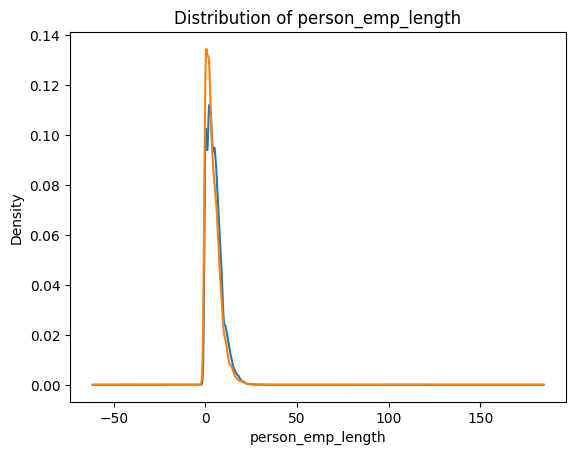

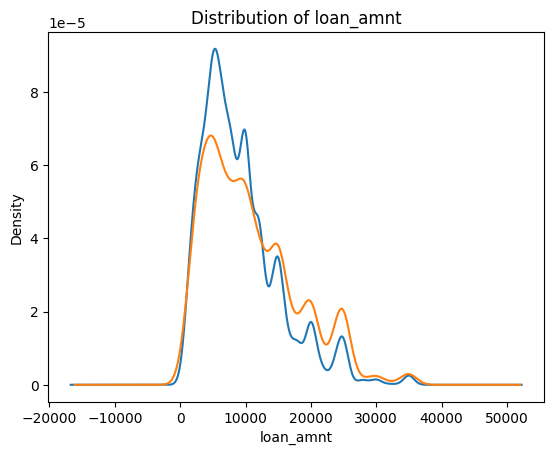

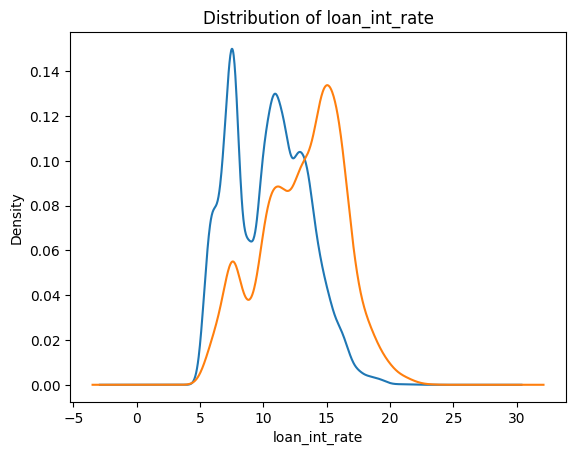

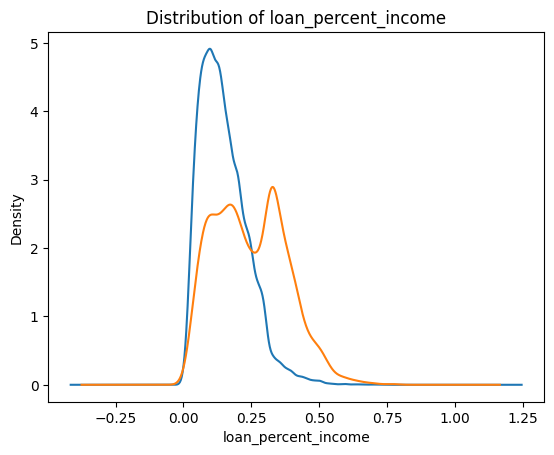

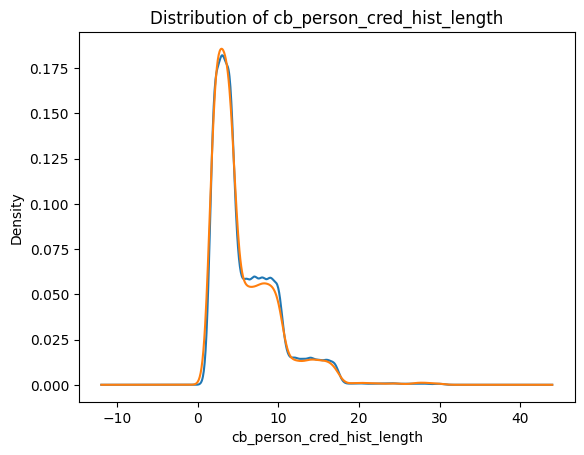

In [202]:
grpby = credit_base.groupby('loan_status')
for col in columns:
    plt.figure()
    grpby[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Numerical features based bivariate analysis

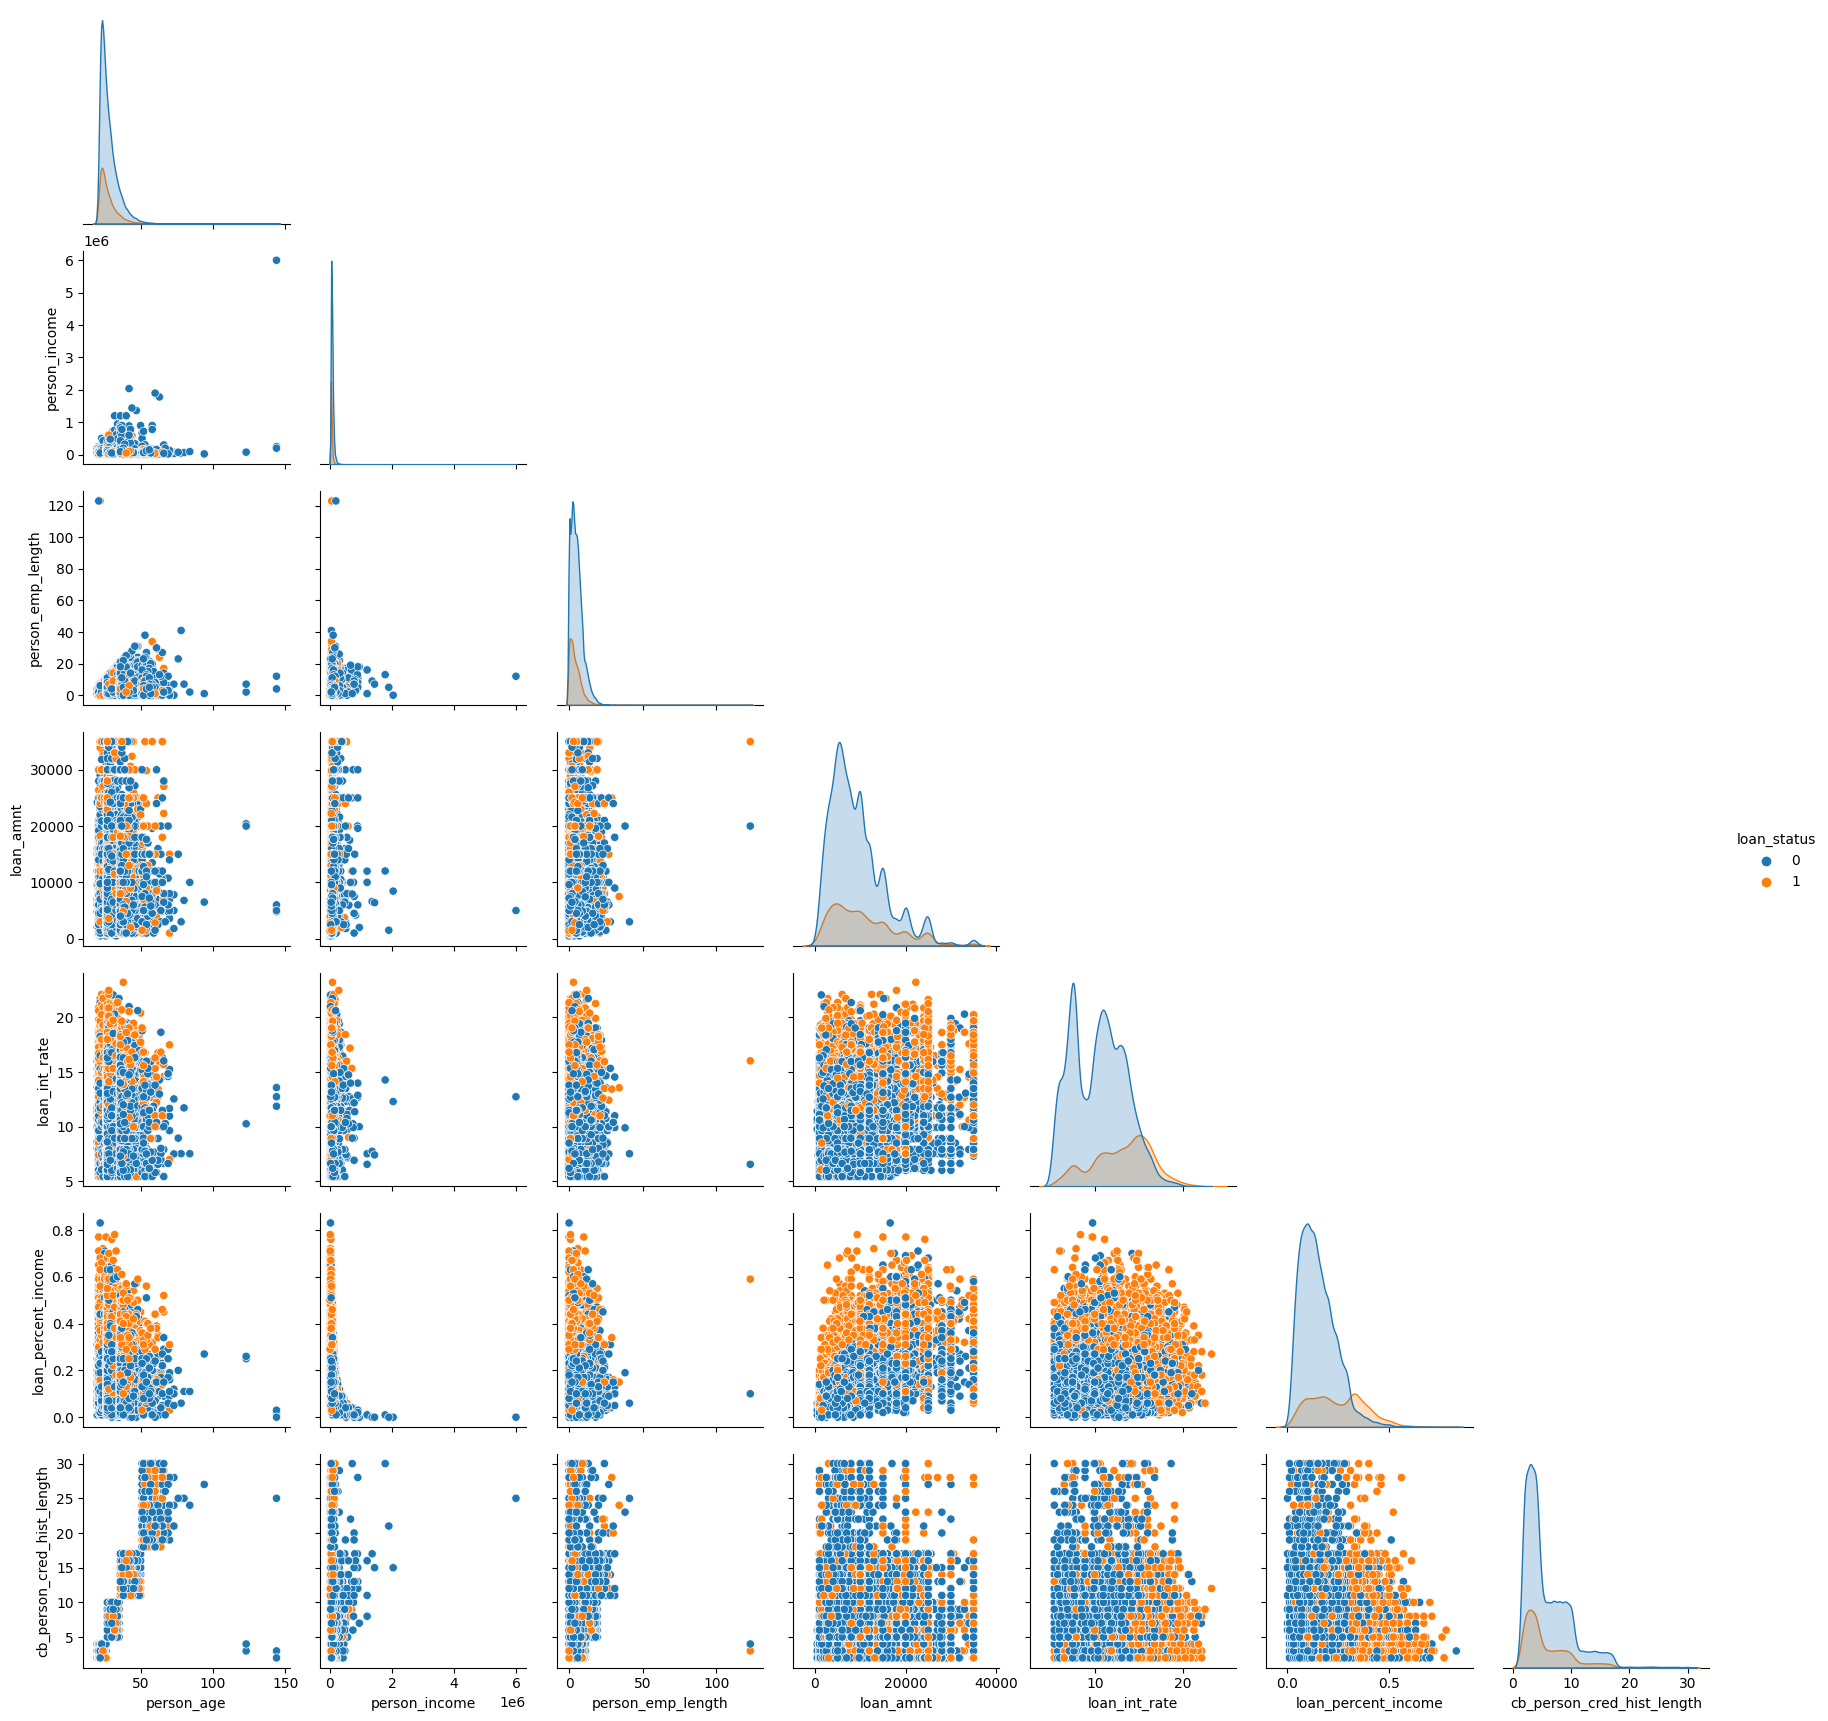

In [203]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

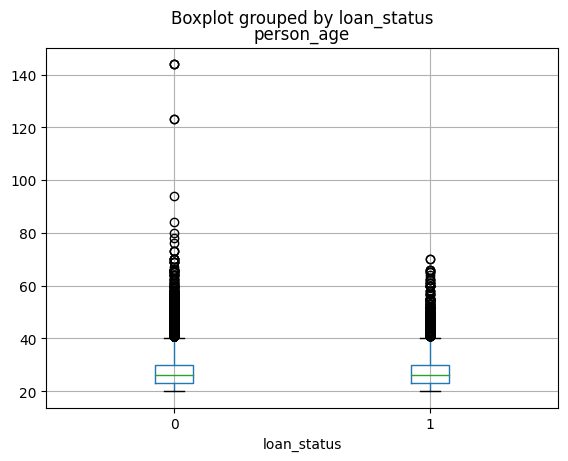

In [204]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [205]:
credit_base['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [206]:
credit_base['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [207]:
credit_base['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [208]:
credit_base['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<Axes: xlabel='person_age', ylabel='cb_person_default_on_file'>

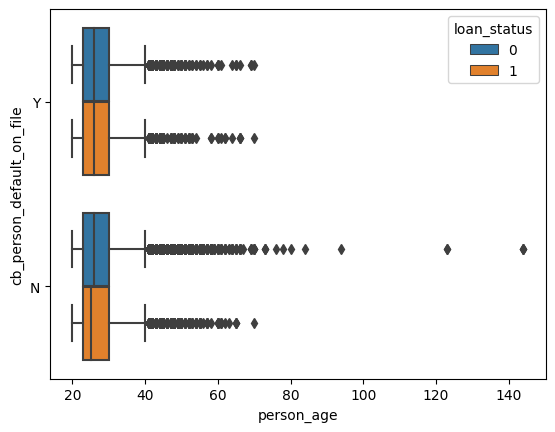

In [209]:
sns.boxplot(data=credit_base, x="person_age", y="cb_person_default_on_file", hue="loan_status")

#PREPROCESSING

##dropping null valued rows

In [210]:
credit_base.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [211]:
credit_base = credit_base.dropna()

In [212]:
credit_base.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##outliers

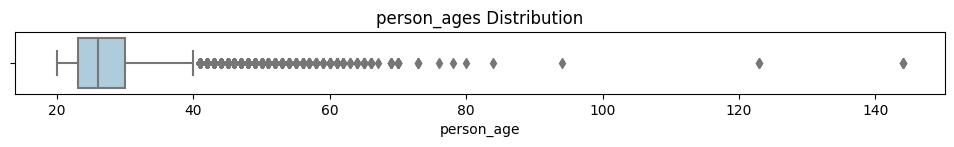

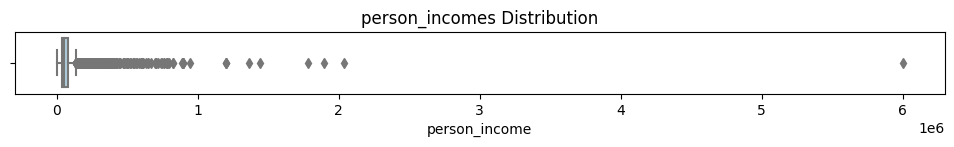

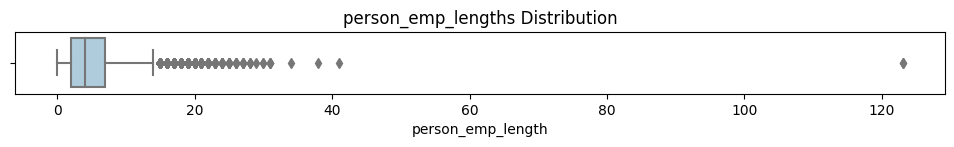

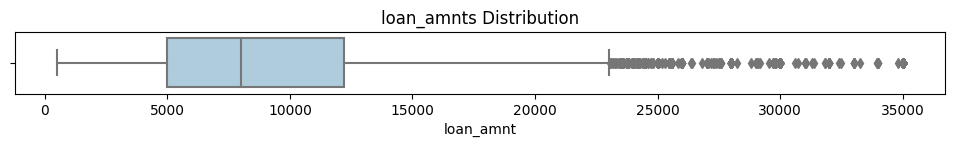

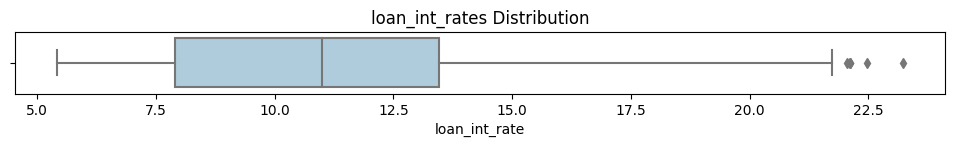

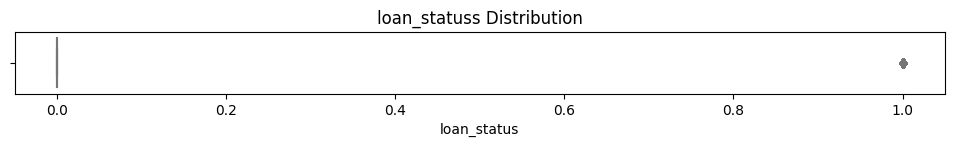

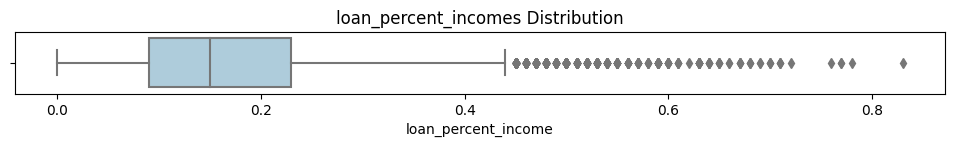

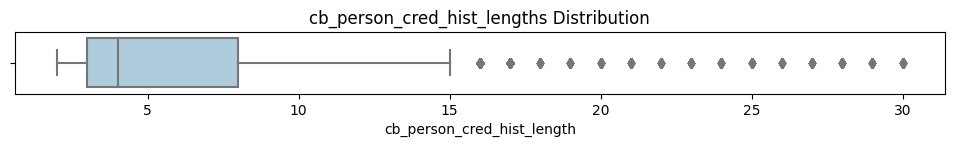

In [213]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [214]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


In [215]:
credit_base.shape

(28638, 12)

In [216]:
for col in columns:
  credit_base = credit_base[(credit_base[col] <= credit_base[col].mean() + 3*credit_base[col].std()) &
        (credit_base[col] >= credit_base[col].mean() - 3*credit_base[col].std())]

In [217]:
credit_base.shape

(26620, 12)

##encoding

In [218]:
credit_base.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [219]:
credit_base['cb_person_default_on_file'] = credit_base['cb_person_default_on_file'].astype('category')
credit_base['loan_grade'] = credit_base['loan_grade'].astype('category')
credit_base['loan_intent'] = credit_base['loan_intent'].astype('category')
credit_base['person_home_ownership'] = credit_base['person_home_ownership'].astype('category')

In [220]:
credit_base['cb_person_default_on_file_new'] = credit_base['cb_person_default_on_file'].cat.codes
credit_base['loan_grade_new'] = credit_base['loan_grade'].cat.codes
credit_base['loan_intent_new'] = credit_base['loan_intent'].cat.codes
credit_base['person_home_ownership_new'] = credit_base['person_home_ownership'].cat.codes

In [221]:
credit_base['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [222]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(credit_base[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(credit_base.index))

In [223]:
np.array(credit_base.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [224]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [225]:
New_df=credit_base.join(enc_data)

In [226]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [227]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [228]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [229]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# stripping target values

In [230]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [231]:
features.shape

(26620, 30)

In [232]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [233]:
del New_df

# train test split

In [234]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# standarising data

In [235]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

# feature extraction

In [236]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [237]:
extracted_features

Index([                'person_age',              'person_income',
                'person_emp_length',                  'loan_amnt',
                    'loan_int_rate',        'loan_percent_income',
       'cb_person_cred_hist_length',             'loan_grade_new',
                  'loan_intent_new',  'person_home_ownership_new',
                                  0,                            5,
                                  9,                           10,
                                 11,                           12,
                                 13,                           15,
                                 17,                           18],
      dtype='object')

In [238]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True])

In [239]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

# class imbalance

In [240]:
credit_base['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

# upsampling

In [241]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [242]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


# downsampling

In [243]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [244]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))

Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17413, 30)
After UnderSampling, the shape of train_y: (17413,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12925
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [245]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)

In [246]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


#PCA

#no resampling

In [247]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [248]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [249]:
X_train_pca.shape

(21296, 19)

In [250]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197 0.99554266 0.99814181 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [251]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197]


In [252]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [253]:
X_train_upsampled_pca.shape

(33616, 18)

In [254]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

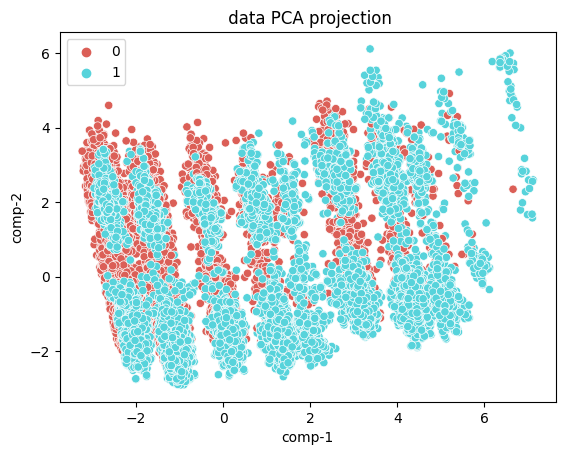

In [255]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

#downsample

In [256]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [257]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [258]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [259]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

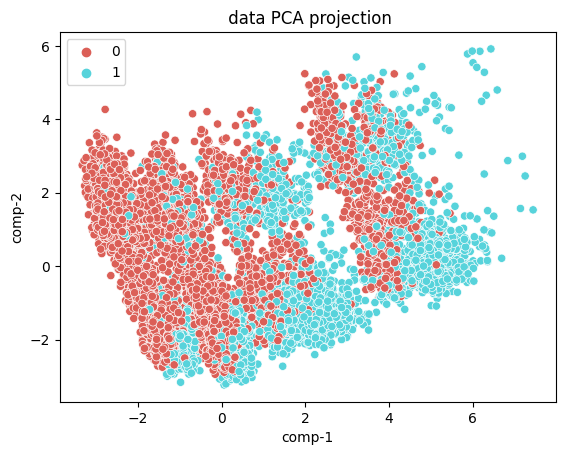

In [260]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

#Models

In [261]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [262]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [263]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve for LR')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [264]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [265]:
resultDic={}

#LR Model with GridsearchCV

In [266]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [267]:
LRresult={}

##Logistic Regression without resampling

In [268]:
grid_result = LR(x_train, y_train)

In [269]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [270]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [271]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


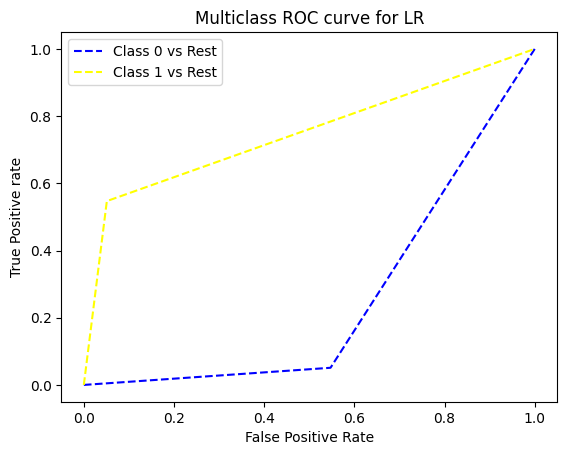

In [272]:
roc(y_test, y_prediction)

##Logistic Regression without resampling and pca

In [273]:
grid_result = LR(x_train_pca, y_train)

In [274]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [275]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of the Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [276]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


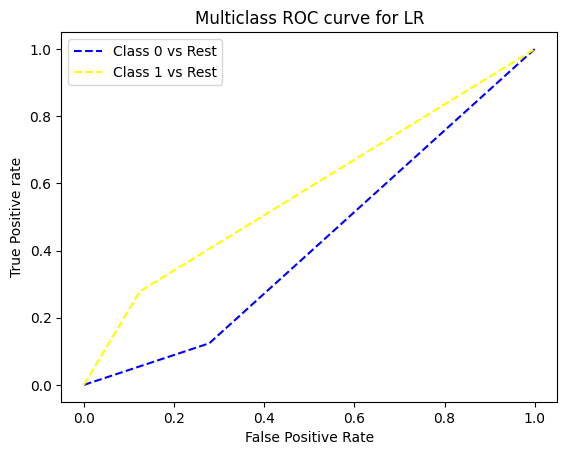

In [277]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling

In [278]:
grid_result = LR(x_train_dres, y_train_dres)

In [279]:
results(grid_result)

Best: 0.880941 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.002720) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880536 (0.002674) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.880468 (0.003108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.880941 (0.003113) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.003576) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.878981 (0.003391) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [280]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',LRresult['LR3'])

Analysis of the Algorithm:

[[3603  628]
 [ 293  800]]
[[3603  628]
 [ 293  800]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4231
           1       0.56      0.73      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8270097670924117
Precision: 0.8499495006519464
Recall: 0.8270097670924117
F1 Score: 0.8349381822430395
testing recall Score: 0.7319304666056725


In [281]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7355169340463458


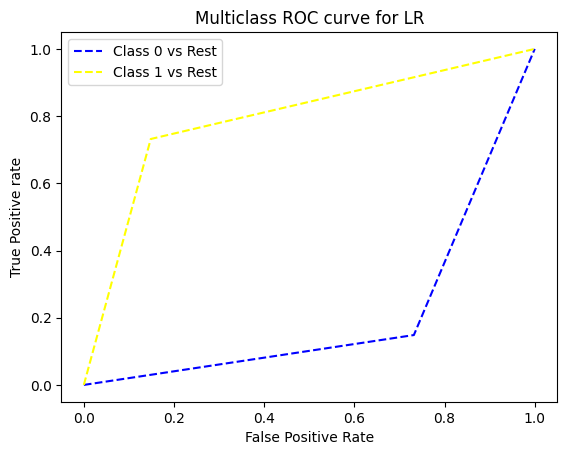

In [282]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling and pca

In [283]:
grid_result = LR(x_train_downsampled_pca, y_train_dres)

In [284]:
results(grid_result)

Best: 0.880198 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880198 (0.003475) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003395) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.879860 (0.003320) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.879724 (0.002797) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.002598) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.875262 (0.003002) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [285]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',LRresult['LR4'])

Analysis of the Algorithm:

[[3587  644]
 [ 285  808]]
[[3587  644]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4231
           1       0.56      0.74      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8255071374906086
Precision: 0.8504510831713763
Recall: 0.8255071374906086
F1 Score: 0.8339487815640269
testing class 1 recall Score: 0.7392497712717292


In [286]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7375222816399287


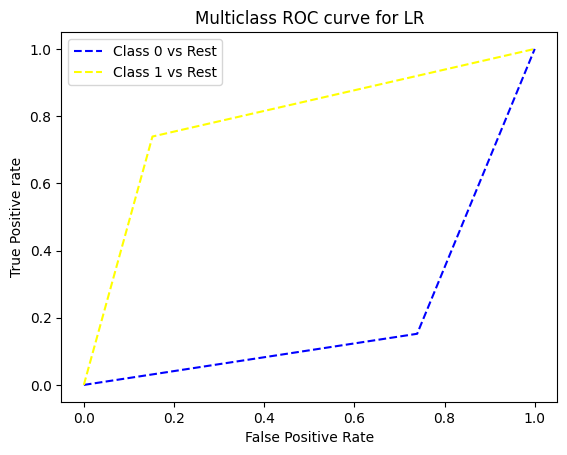

In [287]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling

In [288]:
grid_result = LR(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [289]:
results(grid_result)

Best: 0.803546 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002465) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.802475 (0.002497) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.802445 (0.002450) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.802534 (0.002503) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.802415 (0.002411) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002429) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.803546 (0.002678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802713 (0.002042) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [290]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR5'])

Analysis of the Algorithm:

[[3441  790]
 [ 256  837]]
[[3441  790]
 [ 256  837]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4231
           1       0.51      0.77      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.72      0.79      0.74      5324
weighted avg       0.85      0.80      0.82      5324

Accuracy: 0.8035311795642374
Precision: 0.845287382224053
Recall: 0.8035311795642374
F1 Score: 0.8162002085314433
Class 1 recall score for test data: 0.7657822506861848


In [291]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7852213231794384


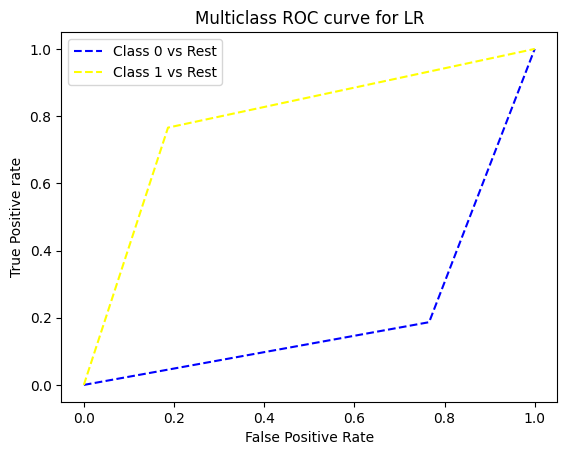

In [292]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling and pca

In [293]:
grid_result = LR(X_train_upsampled_pca, y_train_ures_SMOTE)

In [294]:
results(grid_result)

Best: 0.788732 using {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.787928 (0.004138) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.787839 (0.004132) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.787988 (0.004184) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.788018 (0.003949) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.788732 (0.004308) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [295]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR6'])

Analysis of the Algorithm:

[[3363  868]
 [ 253  840]]
[[3363  868]
 [ 253  840]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4231
           1       0.49      0.77      0.60      1093

    accuracy                           0.79      5324
   macro avg       0.71      0.78      0.73      5324
weighted avg       0.84      0.79      0.80      5324

Accuracy: 0.7894440270473329
Precision: 0.840066001671411
Recall: 0.7894440270473329
F1 Score: 0.8043082828519552
Class 1 recall score for test data: 0.7685269899359561


In [296]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7793907663017611


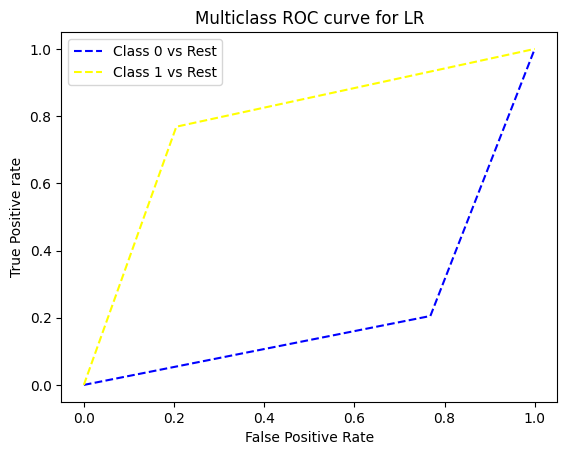

In [297]:
roc(y_test, y_prediction)

##Logistic Regression with select features

In [298]:
grid_result = LR(featureSelectedTrain, y_train)

In [299]:
results(grid_result)

Best: 0.864059 using {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.864059 (0.001294) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.864059 (0.001294) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.864059 (0.001294) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.864059 (0.001294) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.864059 (0.001242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.863918 (0.001248) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.864012 (0.001067) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.863777 (0.001212) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.861993 (0.001774) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.860960 (0.002487) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [300]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
LRresult['LR7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR7'])

Analysis of the Algorithm:

[[4000  231]
 [ 510  583]]
[[4000  231]
 [ 510  583]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.72      0.53      0.61      1093

    accuracy                           0.86      5324
   macro avg       0.80      0.74      0.76      5324
weighted avg       0.85      0.86      0.85      5324

Accuracy: 0.8608189331329827
Precision: 0.8518734435498835
Recall: 0.8608189331329827
F1 Score: 0.8528588513462477
testing recall Score for class1: 0.5333943275388838


In [301]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5349821746880571


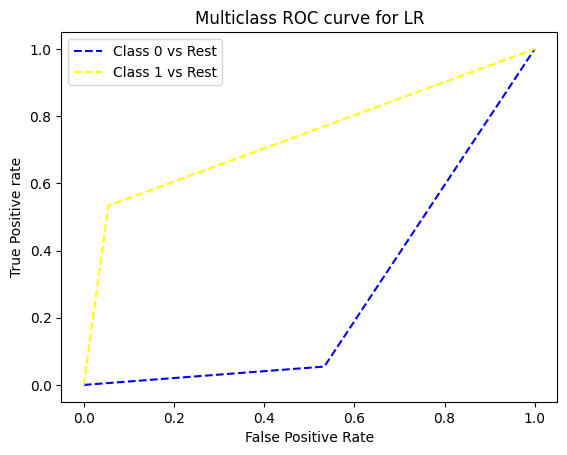

In [302]:
roc(y_test, y_prediction)

##Logistic Regression comparision

In [303]:
LRresult

{'LR1': 0.5471180237877402,
 'LR2': 0.27813357731015553,
 'LR3': 0.7319304666056725,
 'LR4': 0.7392497712717292,
 'LR5': 0.7657822506861848,
 'LR6': 0.7685269899359561,
 'LR7': 0.5333943275388838}

Logistic Regression with neighborhood cleaning rule undersampling and PCA gave better Recall score for Class 1 

In [304]:
resultDic['LogisticRegression']=0.7685269899359561#LR6

#Decision Tree with gridsearchCV

In [305]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="entropy")
  max_depth = [3, 4, 5, 6, 7, 8, 9]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [306]:
DTresult={}

##Decision Tree without resampling

In [307]:
grid_result = DT(x_train, y_train)

In [308]:
results(grid_result)

Best: 0.927498 using {'max_depth': 9, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 4}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 20}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 4}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 10}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 20}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 4}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 10}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 20}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 4}
0.923976 (0.005482) with: {'max_depth': 6, 'min_samples_split': 10}
0.923788 (0.005602) with: {'max_depth': 6, 'min_samples_split': 20}
0.924727 (0.004472) with: {'max_depth': 7, 'min_samples_split': 4}
0.924868 (0.004595) with: {'max_depth': 7, 'min_samples_sp

In [309]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT1'])

Analysis of the Algorithm:

[[4203   28]
 [ 327  766]]
[[4203   28]
 [ 327  766]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4231
           1       0.96      0.70      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.933320811419985
Precision: 0.9353943206431395
Recall: 0.933320811419985
F1 Score: 0.9291758981633123
testing recall Score for class1: 0.7008234217749314


In [310]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.7043226381461676


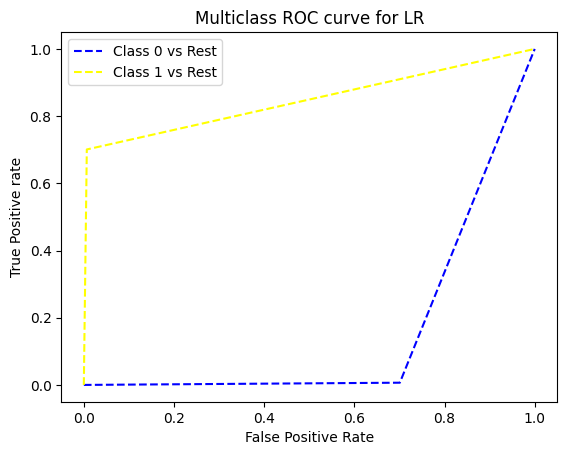

In [311]:
roc(y_test, y_prediction)

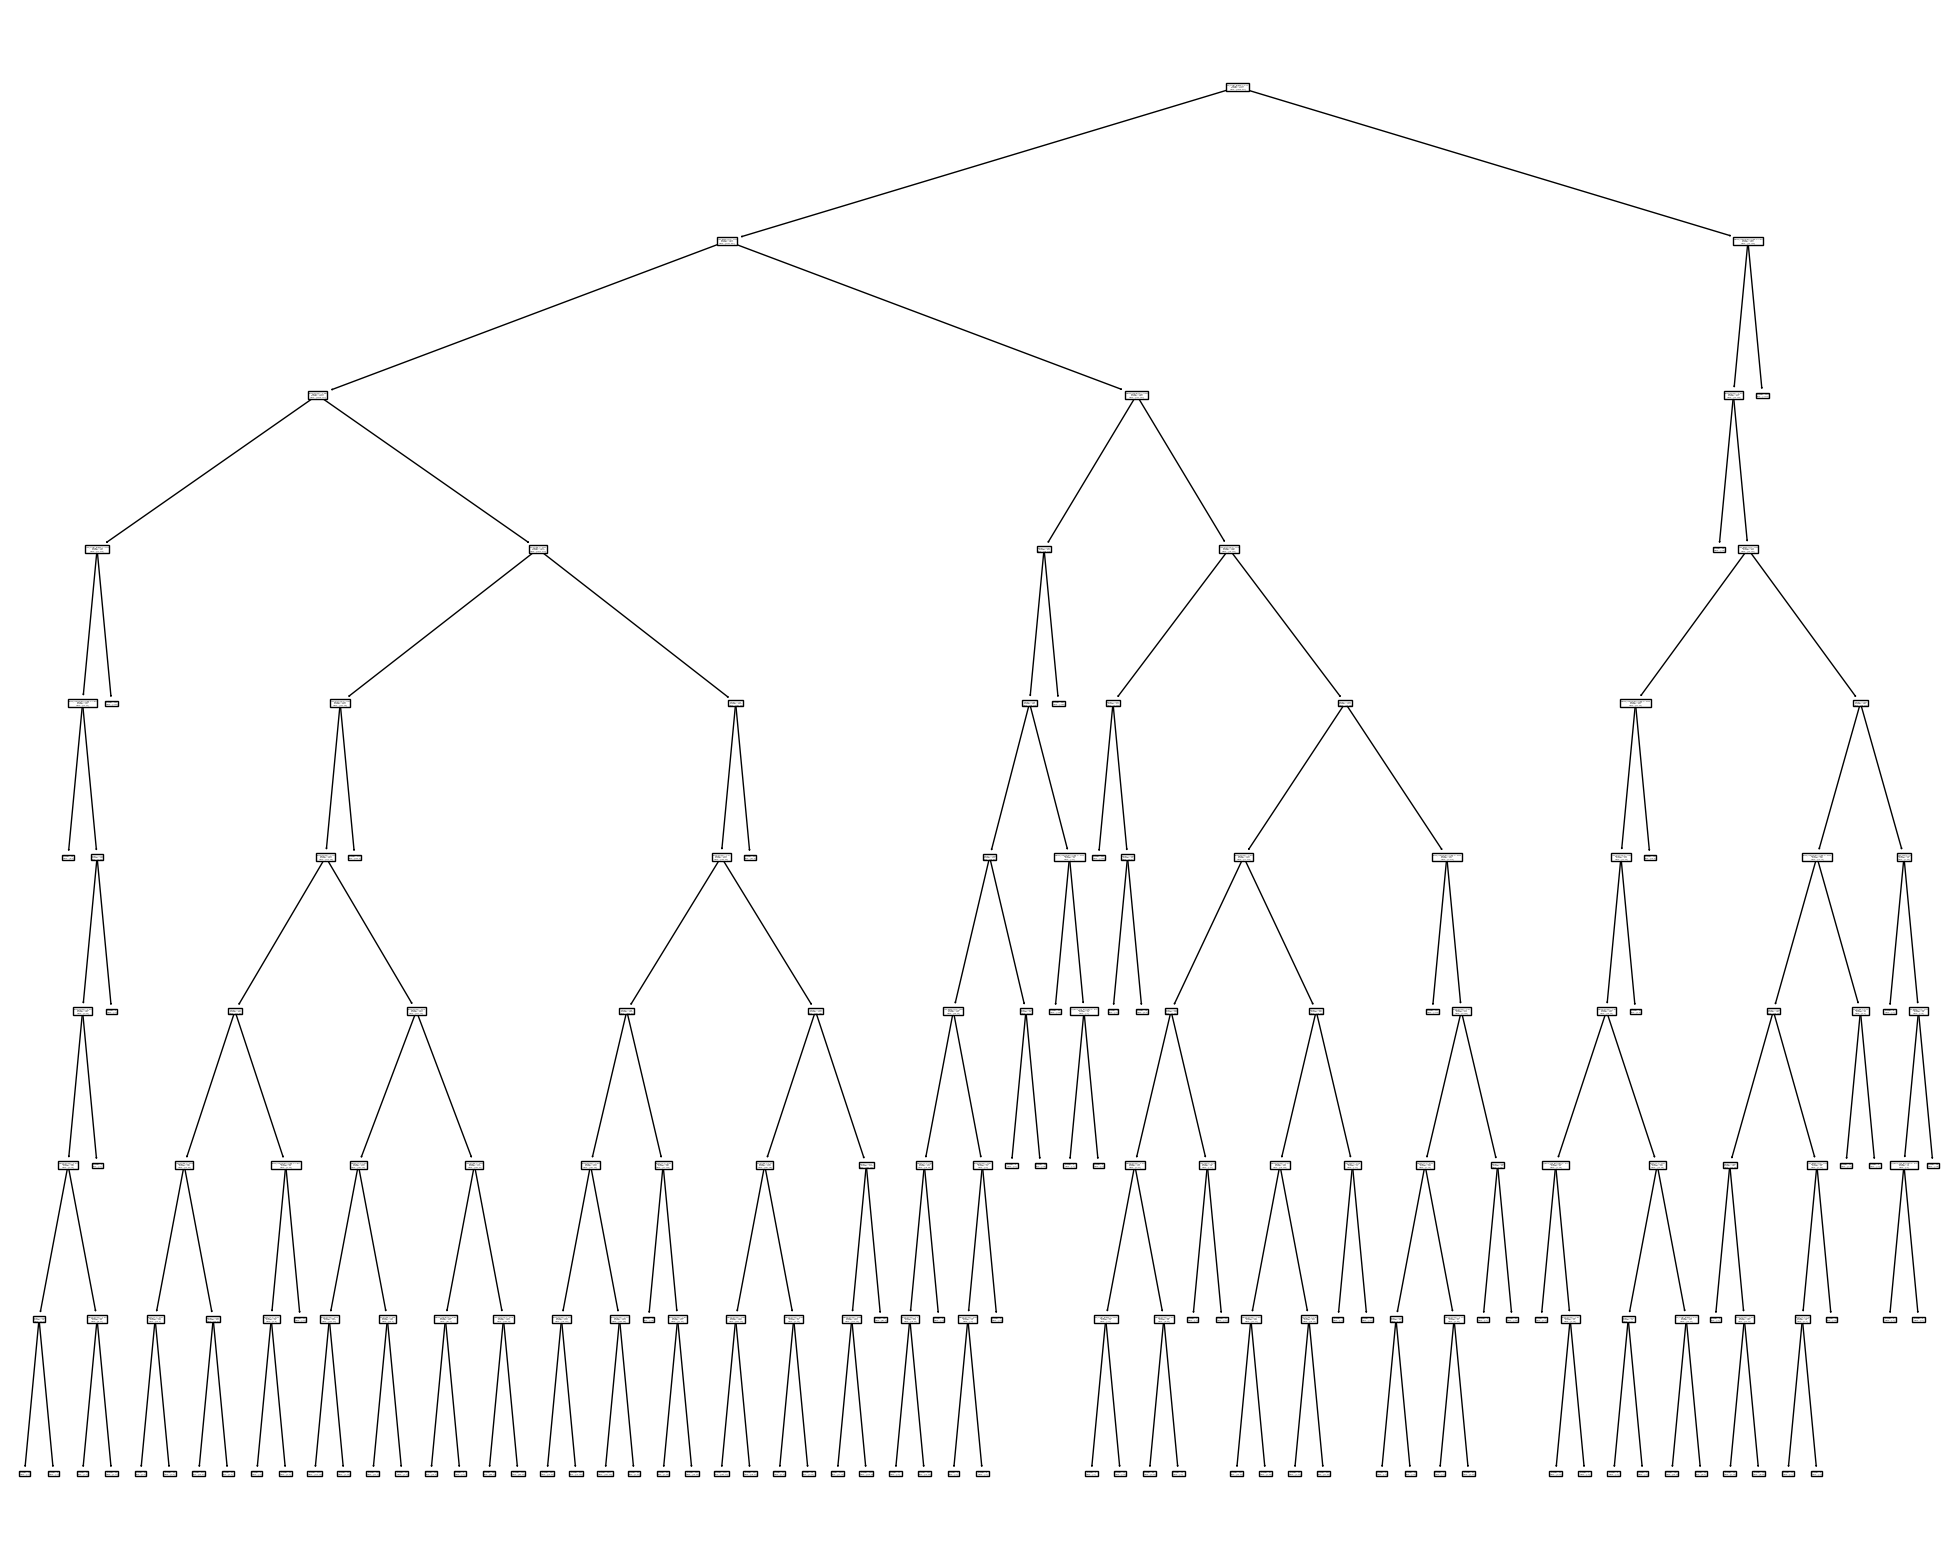

In [312]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
fig = plot_tree(grid_result.best_estimator_, feature_names=features.keys())

##Decision Tree without resampling and pca

In [313]:
grid_result = DT(x_train_pca, y_train)

In [314]:
results(grid_result)

Best: 0.894769 using {'max_depth': 9, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 10}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 20}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 4}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 10}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 20}
0.876174 (0.005875) with: {'max_depth': 5, 'min_samples_split': 4}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 10}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 20}
0.885143 (0.007704) with: {'max_depth': 6, 'min_samples_split': 4}
0.885471 (0.007531) with: {'max_depth': 6, 'min_samples_split': 10}
0.885330 (0.007444) with: {'max_depth': 6, 'min_samples_split': 20}
0.888195 (0.005614) with: {'max_depth': 7, 'min_samples_split': 4}
0.887913 (0.005658) with: {'max_depth': 7, 'min_samples_spl

In [315]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", DTresult['DT2'])

Analysis of the Algorithm:

[[3794  437]
 [ 895  198]]
[[3794  437]
 [ 895  198]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4231
           1       0.31      0.18      0.23      1093

    accuracy                           0.75      5324
   macro avg       0.56      0.54      0.54      5324
weighted avg       0.71      0.75      0.72      5324

Accuracy: 0.7498121712997746
Precision: 0.707030229385422
Recall: 0.7498121712997746
F1 Score: 0.7230794761067293
Class 1 recall score on test data: 0.18115279048490393


In [316]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.6492869875222816


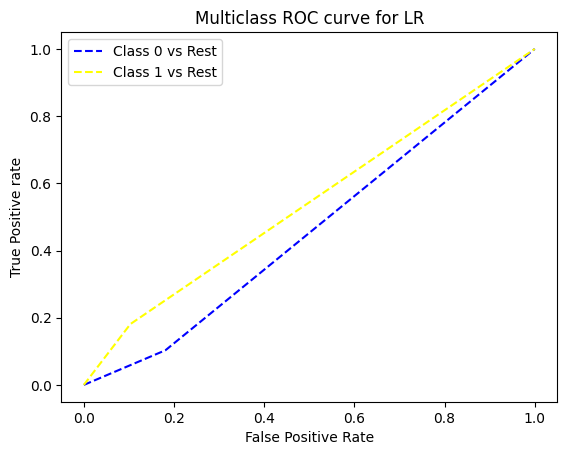

In [317]:
roc(y_test, y_prediction)

##Decision Tree with undersampling

In [318]:
grid_result = DT(x_train_dres, y_train_dres)

In [319]:
results(grid_result)

Best: 0.915151 using {'max_depth': 9, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 10}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 20}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 4}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 10}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 20}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 4}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 10}
0.901359 (0.004969) with: {'max_depth': 5, 'min_samples_split': 20}
0.905550 (0.004895) with: {'max_depth': 6, 'min_samples_split': 4}
0.905483 (0.005001) with: {'max_depth': 6, 'min_samples_split': 10}
0.905280 (0.005041) with: {'max_depth': 6, 'min_samples_split': 20}
0.912717 (0.005335) with: {'max_depth': 7, 'min_samples_split': 4}
0.912649 (0.005433) with: {'max_depth': 7, 'min_samples_spl

In [320]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',DTresult['DT3'])

Analysis of the Algorithm:

[[3934  297]
 [ 274  819]]
[[3934  297]
 [ 274  819]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.73      0.75      0.74      1093

    accuracy                           0.89      5324
   macro avg       0.83      0.84      0.84      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8927498121712998
Precision: 0.8936182088970307
Recall: 0.8927498121712998
F1 Score: 0.8931620019761624
testing recall Score: 0.7493138151875571


In [321]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7729500891265597


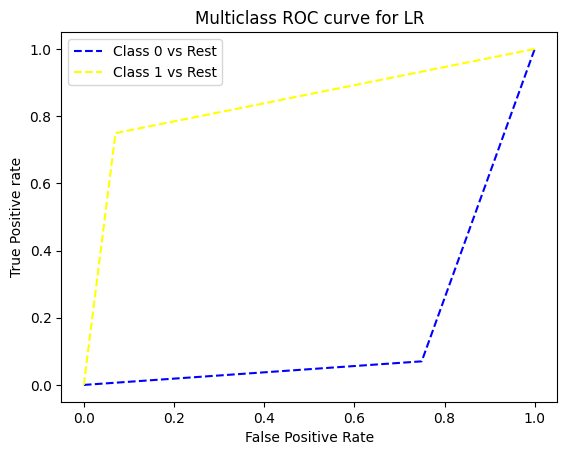

In [322]:
roc(y_test, y_prediction)

##Decision Tree with undersampling and pca

In [323]:
grid_result = DT(x_train_downsampled_pca, y_train_dres)

In [324]:
results(grid_result)

Best: 0.884119 using {'max_depth': 9, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 10}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 20}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 4}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 10}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 20}
0.867216 (0.005155) with: {'max_depth': 5, 'min_samples_split': 4}
0.867216 (0.005155) with: {'max_depth': 5, 'min_samples_split': 10}
0.867081 (0.005101) with: {'max_depth': 5, 'min_samples_split': 20}
0.871408 (0.003677) with: {'max_depth': 6, 'min_samples_split': 4}
0.871003 (0.003478) with: {'max_depth': 6, 'min_samples_split': 10}
0.870732 (0.003798) with: {'max_depth': 6, 'min_samples_split': 20}
0.878643 (0.005631) with: {'max_depth': 7, 'min_samples_split': 4}
0.878846 (0.005662) with: {'max_depth': 7, 'min_samples_spl

In [325]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',DTresult['DT4'])

Analysis of the Algorithm:

[[3803  428]
 [ 311  782]]
[[3803  428]
 [ 311  782]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.65      0.72      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.79      0.81      0.80      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8611945905334335
Precision: 0.8673066204457704
Recall: 0.8611945905334335
F1 Score: 0.8637474252637511
testing class 1 recall Score: 0.7154620311070449


In [326]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7589126559714795


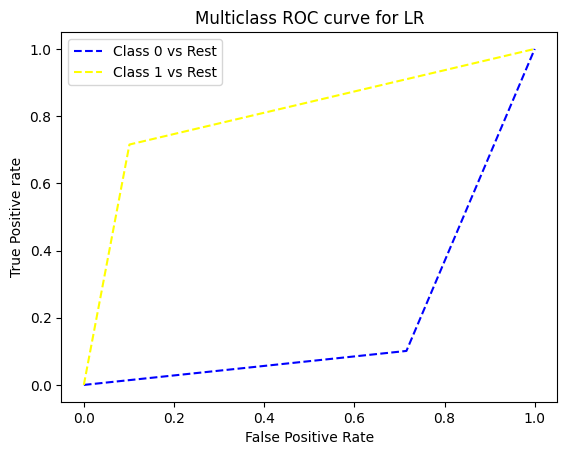

In [327]:
roc(y_test, y_prediction)

##Decision Tree with upsampling

In [328]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [329]:
grid_result = DT(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [330]:
results(grid_result)

Best: 0.872174 using {'max_depth': 11, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 10}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 20}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 4}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 10}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 20}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 4}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 10}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 20}
0.847275 (0.005494) with: {'max_depth': 6, 'min_samples_split': 4}
0.847305 (0.005504) with: {'max_depth': 6, 'min_samples_split': 10}
0.847246 (0.005481) with: {'max_depth': 6, 'min_samples_split': 20}
0.853731 (0.004097) with: {'max_depth': 7, 'min_samples_split': 4}
0.853850 (0.004036) with: {'max_depth': 7, 'min_samples_sp

In [331]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT5'])

Analysis of the Algorithm:

[[4076  155]
 [ 286  807]]
[[4076  155]
 [ 286  807]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4231
           1       0.84      0.74      0.79      1093

    accuracy                           0.92      5324
   macro avg       0.89      0.85      0.87      5324
weighted avg       0.91      0.92      0.92      5324

Accuracy: 0.917167543200601
Precision: 0.9148163243178987
Recall: 0.917167543200601
F1 Score: 0.915158773630206
Class 1 recall score for test data: 0.7383348581884721


In [332]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8014635887672537


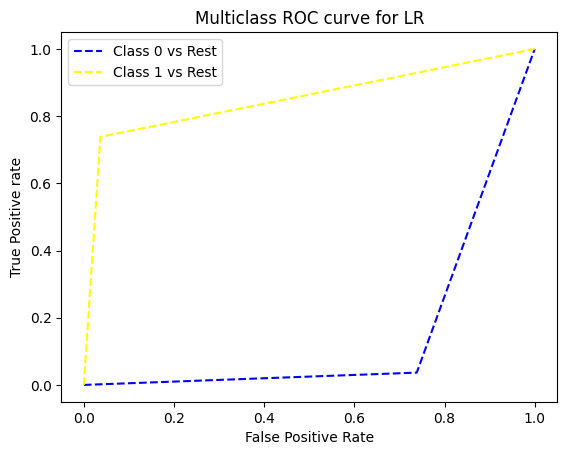

In [333]:
roc(y_test, y_prediction)

##Decision Tree with upsampling and pca

In [334]:
grid_result = DT(X_train_upsampled_pca, y_train_ures_SMOTE)

In [335]:
results(grid_result)

Best: 0.841356 using {'max_depth': 11, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 10}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 20}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 4}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 10}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 20}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 4}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 10}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 20}
0.805152 (0.003986) with: {'max_depth': 6, 'min_samples_split': 4}
0.805271 (0.004185) with: {'max_depth': 6, 'min_samples_split': 10}
0.805123 (0.004274) with: {'max_depth': 6, 'min_samples_split': 20}
0.813571 (0.002903) with: {'max_depth': 7, 'min_samples_split': 4}
0.813571 (0.002587) with: {'max_depth': 7, 'min_samples_sp

In [336]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT6'])

Analysis of the Algorithm:

[[3891  340]
 [ 353  740]]
[[3891  340]
 [ 353  740]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4231
           1       0.69      0.68      0.68      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.8698347107438017
Precision: 0.8692691019237587
Recall: 0.8698347107438017
F1 Score: 0.8695451847839428
Class 1 recall score for test data: 0.6770356816102471


In [337]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8088410280818658


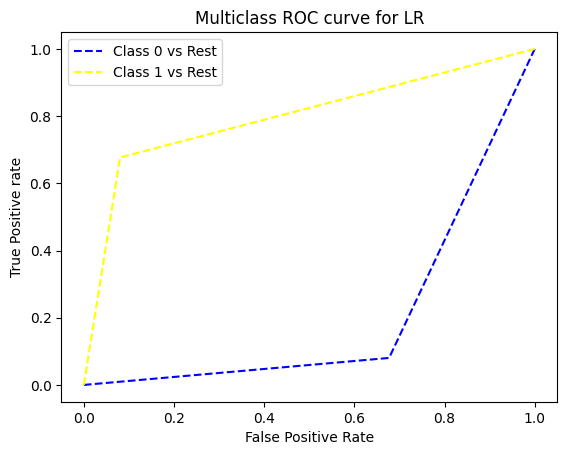

In [338]:
roc(y_test, y_prediction)

##Decision Tree with selected Features

In [339]:
grid_result = DT(featureSelectedTrain, y_train)

In [340]:
results(grid_result)

Best: 0.928390 using {'max_depth': 8, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 4}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 10}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926559 (0.005857) with: {'max_depth': 7, 'min_samples_split': 4}
0.926606 (0.005938) with: {'max_depth': 7, 'min_samples_sp

In [341]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
DTresult['DT7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT7'])

Analysis of the Algorithm:

[[4212   19]
 [ 330  763]]
[[4212   19]
 [ 330  763]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.9344477836213373
Precision: 0.9372726346361127
Recall: 0.9344477836213373
F1 Score: 0.9301732221973202
testing recall Score for class1: 0.6980786825251601


In [342]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6947415329768271


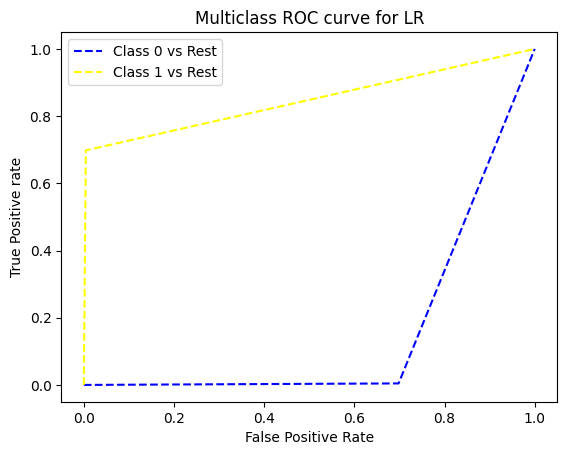

In [343]:
roc(y_test, y_prediction)

##Decision Tree Comparision

In [344]:
DTresult

{'DT1': 0.7008234217749314,
 'DT2': 0.18115279048490393,
 'DT3': 0.7493138151875571,
 'DT4': 0.7154620311070449,
 'DT5': 0.7383348581884721,
 'DT6': 0.6770356816102471,
 'DT7': 0.6980786825251601}

In [345]:
resultDic['Decision Tree'] = 0.7465690759377859#DT3, {'max_depth': 9, 'min_samples_split': 20}

#Random Forest with gridsearchCV

In [346]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
def RF(x_train, y_train):
  model = RandomForestClassifier()
  n_estimators= [ 10, 50, 100]
  max_depth = [3, 4, 5, 6, 7]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(n_estimators=n_estimators,min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [348]:
RFresult = {}

##Random Forest without resampling

In [349]:
grid_result = RF(x_train, y_train)

In [350]:
results(grid_result)

Best: 0.921722 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
0.861428 (0.025428) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.871571 (0.017788) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.874295 (0.018221) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.856030 (0.012525) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.865608 (0.008703) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.861804 (0.017347) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.871196 (0.015095) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.859928 (0.016331) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.858705 (0.014459) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.892843 (0.007737) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.899934 (0.009199) with: {'max_depth

In [351]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF1'])

Analysis of the Algorithm:

[[4200   31]
 [ 383  710]]
[[4200   31]
 [ 383  710]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4231
           1       0.96      0.65      0.77      1093

    accuracy                           0.92      5324
   macro avg       0.94      0.82      0.86      5324
weighted avg       0.92      0.92      0.92      5324

Accuracy: 0.9222389181066867
Precision: 0.9249982144066008
Recall: 0.9222389181066867
F1 Score: 0.9163293191784736
testing recall Score for class1: 0.6495882891125343


In [352]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6521836007130125


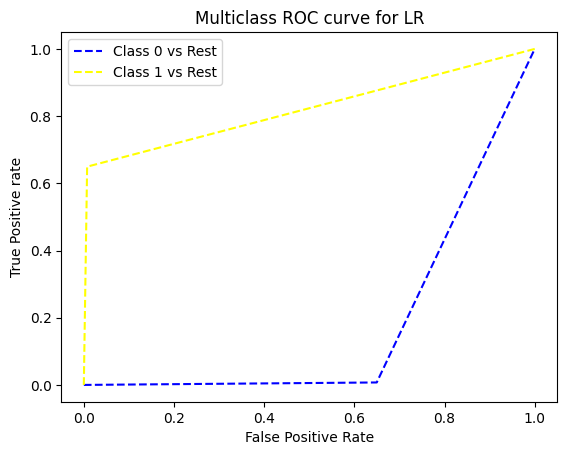

In [353]:
roc(y_test, y_prediction)

##Random Forest without resampling and pca

In [354]:
grid_result = RF(x_train_pca, y_train)

In [355]:
results(grid_result)

Best: 0.895285 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
0.829358 (0.007343) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.829170 (0.002524) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.829874 (0.005725) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.831799 (0.004317) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.830250 (0.002992) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.829827 (0.003967) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.830296 (0.005992) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.832551 (0.003330) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.832644 (0.004204) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.856076 (0.007291) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.857767 (0.004500) with: {'max_depth

In [356]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", RFresult['RF2'])

Analysis of the Algorithm:

[[4078  153]
 [ 954  139]]
[[4078  153]
 [ 954  139]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4231
           1       0.48      0.13      0.20      1093

    accuracy                           0.79      5324
   macro avg       0.64      0.55      0.54      5324
weighted avg       0.74      0.79      0.74      5324

Accuracy: 0.7920736288504884
Precision: 0.7417649977885326
Recall: 0.7920736288504884
F1 Score: 0.740937642954012
Class 1 recall score on test data: 0.12717291857273558


In [357]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5904634581105169


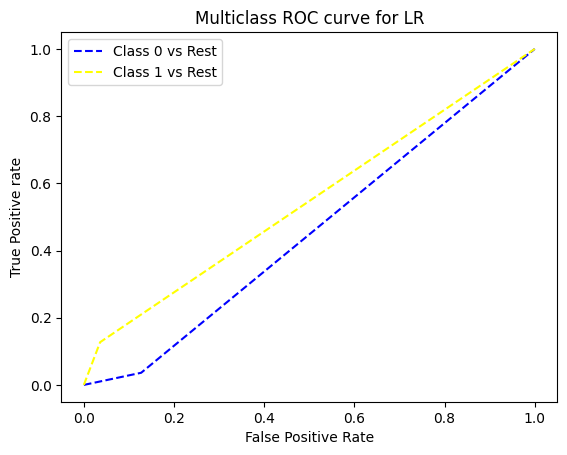

In [358]:
roc(y_test, y_prediction)

##Random Forest with undersampling

In [359]:
grid_result = RF(x_train_dres, y_train_dres)

In [360]:
results(grid_result)

Best: 0.904536 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
0.865052 (0.018616) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.864443 (0.011345) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.867351 (0.010283) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.845376 (0.025086) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.863362 (0.011985) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.857751 (0.013039) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.856400 (0.013393) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.863971 (0.014968) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.857683 (0.006810) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.882225 (0.010617) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.884254 (0.007268) with: {'max_depth

In [361]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',RFresult['RF3'])

Analysis of the Algorithm:

[[3902  329]
 [ 300  793]]
[[3902  329]
 [ 300  793]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4231
           1       0.71      0.73      0.72      1093

    accuracy                           0.88      5324
   macro avg       0.82      0.82      0.82      5324
weighted avg       0.88      0.88      0.88      5324

Accuracy: 0.8818557475582269
Precision: 0.8830640725800206
Recall: 0.8818557475582269
F1 Score: 0.8824260109432788
testing recall Score: 0.7255260750228728


In [362]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7384135472370766


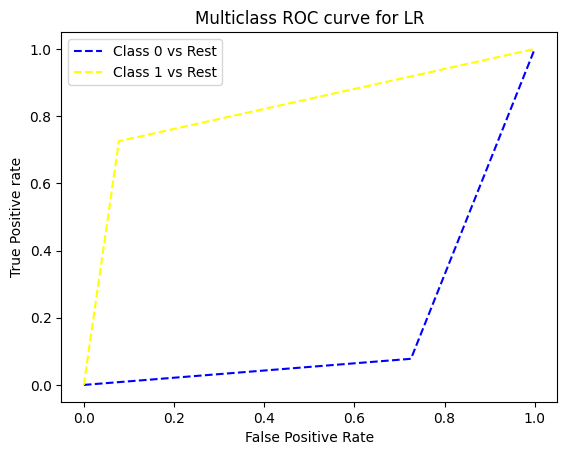

In [363]:
roc(y_test, y_prediction)

##Random Forest with undersampling and pca

In [364]:
grid_result = RF(x_train_downsampled_pca, y_train_dres)

In [365]:
results(grid_result)

Best: 0.895748 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.814414 (0.010030) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.827664 (0.015371) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.822054 (0.010592) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.823339 (0.013577) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.815090 (0.005886) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.817388 (0.006455) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.836184 (0.016950) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.818741 (0.007294) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.821445 (0.008017) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.852138 (0.018134) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.856601 (0.007106) with: {'max_depth':

In [366]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',RFresult['RF4'])

Analysis of the Algorithm:

[[3822  409]
 [ 325  768]]
[[3822  409]
 [ 325  768]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.65      0.70      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.79      0.80      0.79      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8621337340345605
Precision: 0.8663798633810205
Recall: 0.8621337340345605
F1 Score: 0.8639934221628822
testing class 1 recall Score: 0.7026532479414456


In [367]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7308377896613191


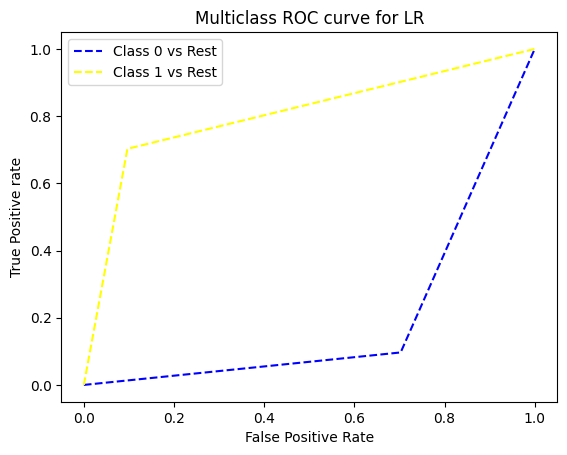

In [368]:
roc(y_test, y_prediction)

##Random Forest with upsampling

In [369]:
grid_result = RF(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [370]:
results(grid_result)

Best: 0.846234 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.805896 (0.011340) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.810983 (0.006764) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.810239 (0.006715) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.804736 (0.009143) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.808574 (0.004989) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.811578 (0.006904) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.810239 (0.004991) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.810507 (0.006938) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.811994 (0.006849) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.818063 (0.010390) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.817498 (0.010161) with: {'max_depth'

In [371]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF5'])

Analysis of the Algorithm:

[[3978  253]
 [ 292  801]]
[[3978  253]
 [ 292  801]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4231
           1       0.76      0.73      0.75      1093

    accuracy                           0.90      5324
   macro avg       0.85      0.84      0.84      5324
weighted avg       0.90      0.90      0.90      5324

Accuracy: 0.8976333583771601
Precision: 0.8963759389268998
Recall: 0.8976333583771601
F1 Score: 0.896938432927583
Class 1 recall score for test data: 0.7328453796889296


In [372]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7560090433127082


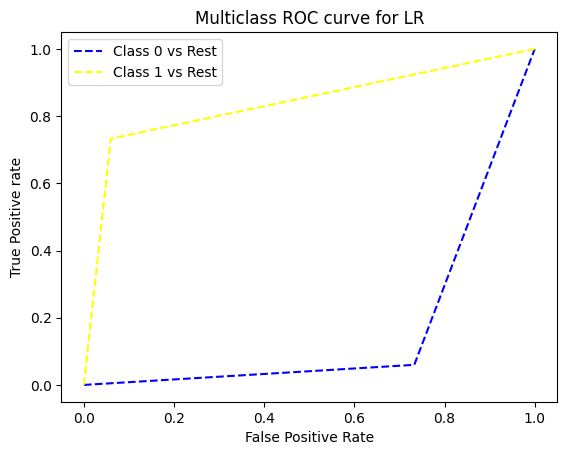

In [373]:
roc(y_test, y_prediction)

##Random Forest with upsampling and pca

In [374]:
grid_result = RF(X_train_upsampled_pca, y_train_ures_SMOTE)

In [375]:
results(grid_result)

Best: 0.831331 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}
0.772638 (0.011074) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.777279 (0.011485) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.778052 (0.005115) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.768176 (0.009433) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.782812 (0.006470) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.778290 (0.006147) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.777963 (0.009992) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.778677 (0.004883) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.779302 (0.002650) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.790041 (0.006353) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.799917 (0.006827) with: {'max_depth'

In [376]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF6'])

Analysis of the Algorithm:

[[3737  494]
 [ 288  805]]
[[3737  494]
 [ 288  805]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      4231
           1       0.62      0.74      0.67      1093

    accuracy                           0.85      5324
   macro avg       0.77      0.81      0.79      5324
weighted avg       0.87      0.85      0.86      5324

Accuracy: 0.8531179564237416
Precision: 0.8650639342530808
Recall: 0.8531179564237416
F1 Score: 0.8576102593391295
Class 1 recall score for test data: 0.7365050320219579


In [377]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7794502617801047


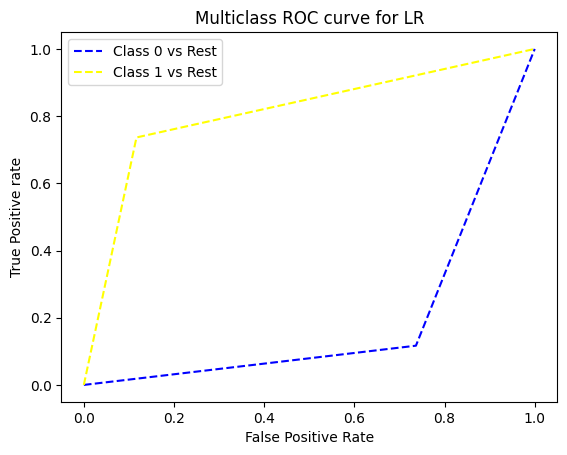

In [378]:
roc(y_test, y_prediction)

##Random Forest without resampling

In [379]:
grid_result = RF(featureSelectedTrain, y_train)

In [380]:
results(grid_result)

Best: 0.924727 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.886176 (0.011927) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.887632 (0.015344) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.882936 (0.008745) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.865045 (0.020597) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.877676 (0.016496) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.888758 (0.014522) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.858376 (0.022594) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.876597 (0.007192) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.881622 (0.008102) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.891341 (0.012589) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.903362 (0.008437) with: {'max_depth'

In [381]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
RFresult['RF7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF7'])

Analysis of the Algorithm:

[[4220   11]
 [ 346  747]]
[[4220   11]
 [ 346  747]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4231
           1       0.99      0.68      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.84      0.88      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.9329451540195342
Precision: 0.9368001465361562
Recall: 0.9329451540195342
F1 Score: 0.9281540152601576
testing recall Score for class1: 0.6834400731930467


In [382]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6724598930481284


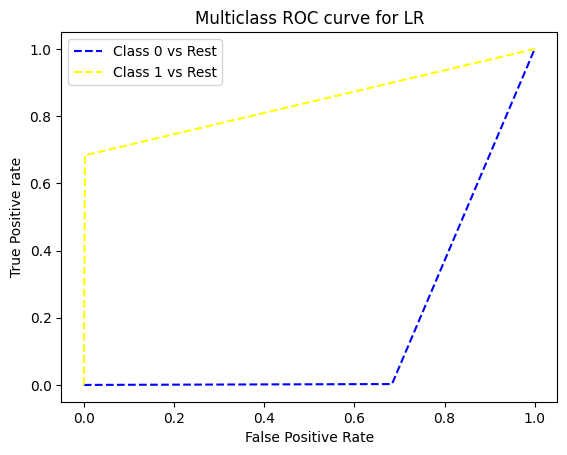

In [383]:
roc(y_test, y_prediction)

##Random Forest Comparision

In [384]:
RFresult

{'RF1': 0.6495882891125343,
 'RF2': 0.12717291857273558,
 'RF3': 0.7255260750228728,
 'RF4': 0.7026532479414456,
 'RF5': 0.7328453796889296,
 'RF6': 0.7365050320219579,
 'RF7': 0.6834400731930467}

In [385]:
resultDic['Random Forest'] = 0.7319304666056725 #'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50

# DNN 


In [386]:
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.metrics import AUC
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
def FCNN(X_train, y_train, X_test):
    batch_size = 256
    epochs = 30
    np.random.seed(5)        

    model = Sequential()

    model.add(Dense(input_shape= (X_train.shape[1],), units = 150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 75, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.build()
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(thresholds=0.5)])
    model.summary()

    early_stops = EarlyStopping(patience=10, monitor='val_acc')
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit(X_train, y_train, callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)

    pred = model.predict(X_test)
  
    return pred

In [387]:
def print_analysis(y_test, results):
  print('ROC_AUC of the test set:', roc_auc_score(y_test, results))
  results_class = (np.array(results) > 0.1).astype(int)
  cm = confusion_matrix(y_test, results_class)
  print('\nConfusion_metrix : \n', cm)
  tn = cm[0][0]
  fp = cm[0][1]    
  fn = cm[1][0]
  tp = cm[1][1]
  precision = tp / (tp + fp)
  print( 'Precision : ', precision )
  recall = tp / (tp + fn)
  print( 'Recall : ', recall )
  print( 'F1-score :', 2*precision*recall/(precision+recall))

DNN without resampling

In [388]:
results1 = FCNN(x_train, y_train, x_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               4650      
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_1 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 75)                0

84/84 [==============================] - 5s 7ms/step - loss: 0.5518 - recall: 0.7525
Epoch 2/30
80/84 [===========================>..] - ETA: 0s - loss: 0.3759 - recall: 0.6991

84/84 [==============================] - 1s 7ms/step - loss: 0.3731 - recall: 0.6992
Epoch 3/30
79/84 [===========================>..] - ETA: 0s - loss: 0.3012 - recall: 0.6443

84/84 [==============================] - 1s 7ms/step - loss: 0.3000 - recall: 0.6446
Epoch 4/30
84/84 [==============================] - ETA: 0s - loss: 0.2797 - recall: 0.6379

84/84 [==============================] - 1s 7ms/step - loss: 0.2797 - recall: 0.6379
Epoch 5/30
83/84 [============================>.] - ETA: 0s - loss: 0.2706 - recall: 0.6327

84/84 [==============================] - 1s 7ms/step - loss: 0.2705 - recall: 0.6326
Epoch 6/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2632 - recall: 0.6355

84/84 [==============================] - 1s 7ms/step - loss: 0.2631 - recall: 0.6357
Epoch 7/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2573 - recall: 0.6446

84/84 [==============================] - 1s 7ms/step - loss: 0.2575 - recall: 0.6448
Epoch 8/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2580 - recall: 0.6368

84/84 [==============================] - 1s 7ms/step - loss: 0.2573 - recall: 0.6373
Epoch 9/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2550 - recall: 0.6458

84/84 [==============================] - 1s 7ms/step - loss: 0.2550 - recall: 0.6444
Epoch 10/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2472 - recall: 0.6462

84/84 [==============================] - 1s 7ms/step - loss: 0.2485 - recall: 0.6448
Epoch 11/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2476 - recall: 0.6514

84/84 [==============================] - 1s 7ms/step - loss: 0.2492 - recall: 0.6491
Epoch 12/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2495 - recall: 0.6565

84/84 [==============================] - 1s 7ms/step - loss: 0.2500 - recall: 0.6557
Epoch 13/30
76/84 [==========================>...] - ETA: 0s - loss: 0.2467 - recall: 0.6523

84/84 [==============================] - 1s 7ms/step - loss: 0.2478 - recall: 0.6517
Epoch 14/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2435 - recall: 0.6512

84/84 [==============================] - 1s 7ms/step - loss: 0.2437 - recall: 0.6506
Epoch 15/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2377 - recall: 0.6598

84/84 [==============================] - 1s 8ms/step - loss: 0.2389 - recall: 0.6586
Epoch 16/30
82/84 [============================>.] - ETA: 0s - loss: 0.2389 - recall: 0.6579

84/84 [==============================] - 1s 10ms/step - loss: 0.2388 - recall: 0.6584
Epoch 17/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2379 - recall: 0.6594

84/84 [==============================] - 1s 10ms/step - loss: 0.2385 - recall: 0.6586
Epoch 18/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2383 - recall: 0.6588

84/84 [==============================] - 1s 10ms/step - loss: 0.2372 - recall: 0.6609
Epoch 19/30
82/84 [============================>.] - ETA: 0s - loss: 0.2379 - recall: 0.6616

84/84 [==============================] - 1s 8ms/step - loss: 0.2374 - recall: 0.6620
Epoch 20/30
83/84 [============================>.] - ETA: 0s - loss: 0.2382 - recall: 0.6640

84/84 [==============================] - 1s 7ms/step - loss: 0.2384 - recall: 0.6638
Epoch 21/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2345 - recall: 0.6705

84/84 [==============================] - 1s 7ms/step - loss: 0.2339 - recall: 0.6696
Epoch 22/30
82/84 [============================>.] - ETA: 0s - loss: 0.2339 - recall: 0.6603

84/84 [==============================] - 1s 7ms/step - loss: 0.2344 - recall: 0.6593
Epoch 23/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2328 - recall: 0.6656

84/84 [==============================] - 1s 7ms/step - loss: 0.2316 - recall: 0.6678
Epoch 24/30
82/84 [============================>.] - ETA: 0s - loss: 0.2319 - recall: 0.6669

84/84 [==============================] - 1s 7ms/step - loss: 0.2318 - recall: 0.6667
Epoch 25/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2356 - recall: 0.6643

84/84 [==============================] - 1s 7ms/step - loss: 0.2348 - recall: 0.6644
Epoch 26/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2332 - recall: 0.6667

84/84 [==============================] - 1s 7ms/step - loss: 0.2325 - recall: 0.6676
Epoch 27/30
83/84 [============================>.] - ETA: 0s - loss: 0.2299 - recall: 0.6683

84/84 [==============================] - 1s 7ms/step - loss: 0.2298 - recall: 0.6682
Epoch 28/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2346 - recall: 0.6622

84/84 [==============================] - 1s 7ms/step - loss: 0.2318 - recall: 0.6671
Epoch 29/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2288 - recall: 0.6680

84/84 [==============================] - 1s 7ms/step - loss: 0.2281 - recall: 0.6684
Epoch 30/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2285 - recall: 0.6704

167/167 [==============================] - 0s 1ms/step


In [389]:
print_analysis(y_test, results1)

ROC_AUC of the test set: 0.9175513241155824

Confusion_metrix : 
 [[2962 1269]
 [ 130  963]]
Precision :  0.4314516129032258
Recall :  0.8810612991765783
F1-score : 0.5792481203007519


DNN without resampling and pca

In [390]:
results2 = FCNN(x_train_pca, y_train, x_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_3 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_4 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 75)               

84/84 [==============================] - 3s 9ms/step - loss: 0.5517 - recall_1: 0.7629
Epoch 2/30
83/84 [============================>.] - ETA: 0s - loss: 0.3776 - recall_1: 0.6980

84/84 [==============================] - 1s 11ms/step - loss: 0.3776 - recall_1: 0.6976
Epoch 3/30
80/84 [===========================>..] - ETA: 0s - loss: 0.3041 - recall_1: 0.6479

84/84 [==============================] - 1s 10ms/step - loss: 0.3035 - recall_1: 0.6466
Epoch 4/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2842 - recall_1: 0.6308

84/84 [==============================] - 1s 10ms/step - loss: 0.2825 - recall_1: 0.6348
Epoch 5/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2734 - recall_1: 0.6261

84/84 [==============================] - 1s 7ms/step - loss: 0.2709 - recall_1: 0.6301
Epoch 6/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2639 - recall_1: 0.6341

84/84 [==============================] - 1s 7ms/step - loss: 0.2649 - recall_1: 0.6346
Epoch 7/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2601 - recall_1: 0.6452

84/84 [==============================] - 1s 7ms/step - loss: 0.2594 - recall_1: 0.6451
Epoch 8/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2568 - recall_1: 0.6478

84/84 [==============================] - 1s 7ms/step - loss: 0.2567 - recall_1: 0.6473
Epoch 9/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2514 - recall_1: 0.6447

84/84 [==============================] - 1s 7ms/step - loss: 0.2527 - recall_1: 0.6451
Epoch 10/30
84/84 [==============================] - ETA: 0s - loss: 0.2496 - recall_1: 0.6497

84/84 [==============================] - 1s 7ms/step - loss: 0.2496 - recall_1: 0.6497
Epoch 11/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2485 - recall_1: 0.6550

84/84 [==============================] - 1s 7ms/step - loss: 0.2487 - recall_1: 0.6544
Epoch 12/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2454 - recall_1: 0.6514

84/84 [==============================] - 1s 7ms/step - loss: 0.2465 - recall_1: 0.6508
Epoch 13/30
83/84 [============================>.] - ETA: 0s - loss: 0.2420 - recall_1: 0.6573

84/84 [==============================] - 1s 7ms/step - loss: 0.2418 - recall_1: 0.6578
Epoch 14/30
83/84 [============================>.] - ETA: 0s - loss: 0.2417 - recall_1: 0.6616

84/84 [==============================] - 1s 7ms/step - loss: 0.2420 - recall_1: 0.6609
Epoch 15/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2406 - recall_1: 0.6663

84/84 [==============================] - 1s 7ms/step - loss: 0.2417 - recall_1: 0.6640
Epoch 16/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2429 - recall_1: 0.6553

84/84 [==============================] - 1s 7ms/step - loss: 0.2426 - recall_1: 0.6553
Epoch 17/30
84/84 [==============================] - ETA: 0s - loss: 0.2381 - recall_1: 0.6627

84/84 [==============================] - 1s 7ms/step - loss: 0.2381 - recall_1: 0.6627
Epoch 18/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2339 - recall_1: 0.6659

84/84 [==============================] - 1s 7ms/step - loss: 0.2350 - recall_1: 0.6662
Epoch 19/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2337 - recall_1: 0.6700

84/84 [==============================] - 1s 7ms/step - loss: 0.2338 - recall_1: 0.6693
Epoch 20/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2331 - recall_1: 0.6635

84/84 [==============================] - 1s 7ms/step - loss: 0.2333 - recall_1: 0.6649
Epoch 21/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2307 - recall_1: 0.6751

84/84 [==============================] - 1s 9ms/step - loss: 0.2323 - recall_1: 0.6720
Epoch 22/30
82/84 [============================>.] - ETA: 0s - loss: 0.2309 - recall_1: 0.6687

84/84 [==============================] - 1s 10ms/step - loss: 0.2314 - recall_1: 0.6682
Epoch 23/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2307 - recall_1: 0.6705

84/84 [==============================] - 1s 10ms/step - loss: 0.2320 - recall_1: 0.6678
Epoch 24/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2283 - recall_1: 0.6758

84/84 [==============================] - 1s 10ms/step - loss: 0.2284 - recall_1: 0.6760
Epoch 25/30
83/84 [============================>.] - ETA: 0s - loss: 0.2312 - recall_1: 0.6731

84/84 [==============================] - 1s 7ms/step - loss: 0.2313 - recall_1: 0.6731
Epoch 26/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2279 - recall_1: 0.6802

84/84 [==============================] - 1s 7ms/step - loss: 0.2265 - recall_1: 0.6814
Epoch 27/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2290 - recall_1: 0.6751

84/84 [==============================] - 1s 7ms/step - loss: 0.2297 - recall_1: 0.6756
Epoch 28/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2293 - recall_1: 0.6699

84/84 [==============================] - 1s 7ms/step - loss: 0.2296 - recall_1: 0.6691
Epoch 29/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2271 - recall_1: 0.6784

84/84 [==============================] - 1s 7ms/step - loss: 0.2277 - recall_1: 0.6767
Epoch 30/30
82/84 [============================>.] - ETA: 0s - loss: 0.2252 - recall_1: 0.6761

167/167 [==============================] - 0s 1ms/step


In [391]:
print_analysis(y_test, results2)

ROC_AUC of the test set: 0.658877111236002

Confusion_metrix : 
 [[2290 1941]
 [ 320  773]]
Precision :  0.2848194546794399
Recall :  0.707227813357731
F1-score : 0.40609403729971105


CNN with undersampling

In [392]:
results3 = FCNN(x_train_dres, y_train_dres, x_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_6 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_7 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 75)               

58/58 [==============================] - 2s 7ms/step - loss: 0.5401 - recall_2: 0.8050
Epoch 2/30
52/58 [=========================>....] - ETA: 0s - loss: 0.3443 - recall_2: 0.8106

58/58 [==============================] - 0s 7ms/step - loss: 0.3399 - recall_2: 0.8084
Epoch 3/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2730 - recall_2: 0.7828

58/58 [==============================] - 0s 7ms/step - loss: 0.2715 - recall_2: 0.7850
Epoch 4/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2470 - recall_2: 0.7788

58/58 [==============================] - 0s 7ms/step - loss: 0.2470 - recall_2: 0.7792
Epoch 5/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2404 - recall_2: 0.7774

58/58 [==============================] - 0s 7ms/step - loss: 0.2385 - recall_2: 0.7783
Epoch 6/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2310 - recall_2: 0.7710

58/58 [==============================] - 0s 7ms/step - loss: 0.2299 - recall_2: 0.7723
Epoch 7/30
58/58 [==============================] - ETA: 0s - loss: 0.2254 - recall_2: 0.7803

58/58 [==============================] - 0s 7ms/step - loss: 0.2254 - recall_2: 0.7803
Epoch 8/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2231 - recall_2: 0.7779

58/58 [==============================] - 0s 7ms/step - loss: 0.2239 - recall_2: 0.7774
Epoch 9/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2192 - recall_2: 0.7832

58/58 [==============================] - 0s 8ms/step - loss: 0.2210 - recall_2: 0.7830
Epoch 10/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2204 - recall_2: 0.7799

58/58 [==============================] - 1s 11ms/step - loss: 0.2187 - recall_2: 0.7812
Epoch 11/30
57/58 [============================>.] - ETA: 0s - loss: 0.2141 - recall_2: 0.7842

58/58 [==============================] - 1s 10ms/step - loss: 0.2134 - recall_2: 0.7850
Epoch 12/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2109 - recall_2: 0.7848

58/58 [==============================] - 1s 10ms/step - loss: 0.2119 - recall_2: 0.7821
Epoch 13/30
58/58 [==============================] - ETA: 0s - loss: 0.2107 - recall_2: 0.7883

58/58 [==============================] - 1s 11ms/step - loss: 0.2107 - recall_2: 0.7883
Epoch 14/30
57/58 [============================>.] - ETA: 0s - loss: 0.2084 - recall_2: 0.7988

58/58 [==============================] - 1s 9ms/step - loss: 0.2088 - recall_2: 0.7988
Epoch 15/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2048 - recall_2: 0.7966

58/58 [==============================] - 0s 7ms/step - loss: 0.2063 - recall_2: 0.7955
Epoch 16/30
57/58 [============================>.] - ETA: 0s - loss: 0.2053 - recall_2: 0.7936

58/58 [==============================] - 0s 7ms/step - loss: 0.2060 - recall_2: 0.7930
Epoch 17/30
58/58 [==============================] - ETA: 0s - loss: 0.2056 - recall_2: 0.7912

58/58 [==============================] - 0s 7ms/step - loss: 0.2056 - recall_2: 0.7912
Epoch 18/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2048 - recall_2: 0.7964

58/58 [==============================] - 0s 7ms/step - loss: 0.2062 - recall_2: 0.7952
Epoch 19/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2006 - recall_2: 0.7988

58/58 [==============================] - 0s 7ms/step - loss: 0.2005 - recall_2: 0.7984
Epoch 20/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1975 - recall_2: 0.7964

58/58 [==============================] - 0s 7ms/step - loss: 0.1978 - recall_2: 0.7952
Epoch 21/30
57/58 [============================>.] - ETA: 0s - loss: 0.2010 - recall_2: 0.7991

58/58 [==============================] - 0s 7ms/step - loss: 0.2012 - recall_2: 0.7988
Epoch 22/30
57/58 [============================>.] - ETA: 0s - loss: 0.1986 - recall_2: 0.8013

58/58 [==============================] - 0s 7ms/step - loss: 0.1990 - recall_2: 0.8010
Epoch 23/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2007 - recall_2: 0.7949

58/58 [==============================] - 0s 7ms/step - loss: 0.2005 - recall_2: 0.7957
Epoch 24/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1969 - recall_2: 0.8015

58/58 [==============================] - 0s 7ms/step - loss: 0.1976 - recall_2: 0.8004
Epoch 25/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2010 - recall_2: 0.8018

58/58 [==============================] - 0s 7ms/step - loss: 0.2004 - recall_2: 0.8015
Epoch 26/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1961 - recall_2: 0.8024

58/58 [==============================] - 0s 7ms/step - loss: 0.1961 - recall_2: 0.8028
Epoch 27/30
57/58 [============================>.] - ETA: 0s - loss: 0.1917 - recall_2: 0.8102

58/58 [==============================] - 0s 7ms/step - loss: 0.1929 - recall_2: 0.8090
Epoch 28/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1905 - recall_2: 0.8103

58/58 [==============================] - 0s 7ms/step - loss: 0.1907 - recall_2: 0.8106
Epoch 29/30
57/58 [============================>.] - ETA: 0s - loss: 0.1931 - recall_2: 0.8098

58/58 [==============================] - 0s 7ms/step - loss: 0.1923 - recall_2: 0.8097
Epoch 30/30
57/58 [============================>.] - ETA: 0s - loss: 0.1905 - recall_2: 0.8038

167/167 [==============================] - 0s 2ms/step


In [393]:
print_analysis(y_test, results3)

ROC_AUC of the test set: 0.9078529426965133

Confusion_metrix : 
 [[2442 1789]
 [  84 1009]]
Precision :  0.36061472480343104
Recall :  0.9231473010064044
F1-score : 0.518632742225649


DNN with downsampling and pca

In [394]:
results4 = FCNN(x_train_downsampled_pca, y_train_dres, x_test_downsampled_transformed_pca)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               2850      
                                                                 
 batch_normalization_9 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_10 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 75)               

58/58 [==============================] - 3s 7ms/step - loss: 0.5368 - recall_3: 0.8275
Epoch 2/30
57/58 [============================>.] - ETA: 0s - loss: 0.3426 - recall_3: 0.8242

58/58 [==============================] - 0s 7ms/step - loss: 0.3425 - recall_3: 0.8229
Epoch 3/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2798 - recall_3: 0.7880

58/58 [==============================] - 0s 7ms/step - loss: 0.2795 - recall_3: 0.7874
Epoch 4/30
57/58 [============================>.] - ETA: 0s - loss: 0.2524 - recall_3: 0.7844

58/58 [==============================] - 0s 7ms/step - loss: 0.2522 - recall_3: 0.7843
Epoch 5/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2382 - recall_3: 0.7798

58/58 [==============================] - 0s 7ms/step - loss: 0.2382 - recall_3: 0.7790
Epoch 6/30
57/58 [============================>.] - ETA: 0s - loss: 0.2339 - recall_3: 0.7755

58/58 [==============================] - 0s 7ms/step - loss: 0.2340 - recall_3: 0.7761
Epoch 7/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2259 - recall_3: 0.7859

58/58 [==============================] - 0s 7ms/step - loss: 0.2268 - recall_3: 0.7834
Epoch 8/30
57/58 [============================>.] - ETA: 0s - loss: 0.2285 - recall_3: 0.7845

58/58 [==============================] - 0s 7ms/step - loss: 0.2283 - recall_3: 0.7843
Epoch 9/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2246 - recall_3: 0.7772

58/58 [==============================] - 0s 7ms/step - loss: 0.2252 - recall_3: 0.7767
Epoch 10/30
58/58 [==============================] - ETA: 0s - loss: 0.2241 - recall_3: 0.7765

58/58 [==============================] - 0s 7ms/step - loss: 0.2241 - recall_3: 0.7765
Epoch 11/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2198 - recall_3: 0.7795

58/58 [==============================] - 0s 7ms/step - loss: 0.2195 - recall_3: 0.7805
Epoch 12/30
57/58 [============================>.] - ETA: 0s - loss: 0.2164 - recall_3: 0.7862

58/58 [==============================] - 0s 7ms/step - loss: 0.2167 - recall_3: 0.7859
Epoch 13/30
57/58 [============================>.] - ETA: 0s - loss: 0.2146 - recall_3: 0.7829

58/58 [==============================] - 0s 8ms/step - loss: 0.2152 - recall_3: 0.7830
Epoch 14/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2133 - recall_3: 0.7911

58/58 [==============================] - 1s 10ms/step - loss: 0.2126 - recall_3: 0.7912
Epoch 15/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2130 - recall_3: 0.7890

58/58 [==============================] - 1s 10ms/step - loss: 0.2143 - recall_3: 0.7888
Epoch 16/30
57/58 [============================>.] - ETA: 0s - loss: 0.2097 - recall_3: 0.7893

58/58 [==============================] - 1s 10ms/step - loss: 0.2096 - recall_3: 0.7899
Epoch 17/30
58/58 [==============================] - ETA: 0s - loss: 0.2083 - recall_3: 0.7926

58/58 [==============================] - 1s 10ms/step - loss: 0.2083 - recall_3: 0.7926
Epoch 18/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2067 - recall_3: 0.8017

58/58 [==============================] - 1s 10ms/step - loss: 0.2071 - recall_3: 0.8010
Epoch 19/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2055 - recall_3: 0.7873

58/58 [==============================] - 0s 7ms/step - loss: 0.2055 - recall_3: 0.7865
Epoch 20/30
57/58 [============================>.] - ETA: 0s - loss: 0.2062 - recall_3: 0.7947

58/58 [==============================] - 0s 7ms/step - loss: 0.2057 - recall_3: 0.7961
Epoch 21/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2056 - recall_3: 0.7964

58/58 [==============================] - 0s 7ms/step - loss: 0.2062 - recall_3: 0.7963
Epoch 22/30
57/58 [============================>.] - ETA: 0s - loss: 0.1996 - recall_3: 0.8003

58/58 [==============================] - 0s 7ms/step - loss: 0.2001 - recall_3: 0.7995
Epoch 23/30
57/58 [============================>.] - ETA: 0s - loss: 0.1981 - recall_3: 0.8046

58/58 [==============================] - 0s 7ms/step - loss: 0.1989 - recall_3: 0.8044
Epoch 24/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2003 - recall_3: 0.8015

58/58 [==============================] - 0s 7ms/step - loss: 0.2008 - recall_3: 0.8008
Epoch 25/30
58/58 [==============================] - ETA: 0s - loss: 0.2004 - recall_3: 0.7997

58/58 [==============================] - 0s 7ms/step - loss: 0.2004 - recall_3: 0.7997
Epoch 26/30
56/58 [===========================>..] - ETA: 0s - loss: 0.1975 - recall_3: 0.8026

58/58 [==============================] - 0s 7ms/step - loss: 0.1978 - recall_3: 0.8024
Epoch 27/30
57/58 [============================>.] - ETA: 0s - loss: 0.2026 - recall_3: 0.8018

58/58 [==============================] - 0s 7ms/step - loss: 0.2018 - recall_3: 0.8030
Epoch 28/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1959 - recall_3: 0.8000

58/58 [==============================] - 0s 7ms/step - loss: 0.1964 - recall_3: 0.7988
Epoch 29/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1930 - recall_3: 0.8078

58/58 [==============================] - 0s 7ms/step - loss: 0.1927 - recall_3: 0.8095
Epoch 30/30
51/58 [=========================>....] - ETA: 0s - loss: 0.1962 - recall_3: 0.8053

167/167 [==============================] - 0s 1ms/step


In [395]:
print_analysis(y_test, results4)

ROC_AUC of the test set: 0.9076964927755168

Confusion_metrix : 
 [[2327 1904]
 [  74 1019]]
Precision :  0.34861443722203217
Recall :  0.9322964318389753
F1-score : 0.5074701195219123


DNN with upsampling

In [396]:
results5 = FCNN(x_train_ures_SMOTE, y_train_ures_SMOTE, x_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 150)               4650      
                                                                 
 batch_normalization_12 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 150)               0         
                                                                 
 dense_17 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_13 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 75)               

132/132 [==============================] - 3s 7ms/step - loss: 0.4702 - recall_4: 0.7615
Epoch 2/30
129/132 [============================>.] - ETA: 0s - loss: 0.3699 - recall_4: 0.7789

132/132 [==============================] - 1s 7ms/step - loss: 0.3699 - recall_4: 0.7788
Epoch 3/30
131/132 [============================>.] - ETA: 0s - loss: 0.3534 - recall_4: 0.7735

132/132 [==============================] - 1s 7ms/step - loss: 0.3531 - recall_4: 0.7738
Epoch 4/30
127/132 [===========================>..] - ETA: 0s - loss: 0.3417 - recall_4: 0.7821

132/132 [==============================] - 1s 7ms/step - loss: 0.3405 - recall_4: 0.7820
Epoch 5/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3358 - recall_4: 0.7796

132/132 [==============================] - 1s 7ms/step - loss: 0.3358 - recall_4: 0.7797
Epoch 6/30
125/132 [===========================>..] - ETA: 0s - loss: 0.3305 - recall_4: 0.7820

132/132 [==============================] - 1s 7ms/step - loss: 0.3304 - recall_4: 0.7822
Epoch 7/30
131/132 [============================>.] - ETA: 0s - loss: 0.3242 - recall_4: 0.7822

132/132 [==============================] - 1s 9ms/step - loss: 0.3240 - recall_4: 0.7823
Epoch 8/30
131/132 [============================>.] - ETA: 0s - loss: 0.3231 - recall_4: 0.7854

132/132 [==============================] - 1s 10ms/step - loss: 0.3231 - recall_4: 0.7853
Epoch 9/30
128/132 [============================>.] - ETA: 0s - loss: 0.3176 - recall_4: 0.7875

132/132 [==============================] - 1s 9ms/step - loss: 0.3176 - recall_4: 0.7883
Epoch 10/30
131/132 [============================>.] - ETA: 0s - loss: 0.3151 - recall_4: 0.7883

132/132 [==============================] - 1s 7ms/step - loss: 0.3151 - recall_4: 0.7884
Epoch 11/30
130/132 [============================>.] - ETA: 0s - loss: 0.3136 - recall_4: 0.7880

132/132 [==============================] - 1s 7ms/step - loss: 0.3139 - recall_4: 0.7877
Epoch 12/30
128/132 [============================>.] - ETA: 0s - loss: 0.3117 - recall_4: 0.7965

132/132 [==============================] - 1s 7ms/step - loss: 0.3114 - recall_4: 0.7966
Epoch 13/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3090 - recall_4: 0.7920

132/132 [==============================] - 1s 7ms/step - loss: 0.3090 - recall_4: 0.7918
Epoch 14/30
131/132 [============================>.] - ETA: 0s - loss: 0.3068 - recall_4: 0.7916

132/132 [==============================] - 1s 7ms/step - loss: 0.3068 - recall_4: 0.7917
Epoch 15/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3051 - recall_4: 0.7920

132/132 [==============================] - 1s 7ms/step - loss: 0.3053 - recall_4: 0.7918
Epoch 16/30
130/132 [============================>.] - ETA: 0s - loss: 0.3027 - recall_4: 0.7972

132/132 [==============================] - 1s 7ms/step - loss: 0.3027 - recall_4: 0.7971
Epoch 17/30
129/132 [============================>.] - ETA: 0s - loss: 0.2996 - recall_4: 0.7973

132/132 [==============================] - 1s 7ms/step - loss: 0.2998 - recall_4: 0.7973
Epoch 18/30
130/132 [============================>.] - ETA: 0s - loss: 0.3007 - recall_4: 0.8010

132/132 [==============================] - 1s 7ms/step - loss: 0.3002 - recall_4: 0.8009
Epoch 19/30
132/132 [==============================] - ETA: 0s - loss: 0.2989 - recall_4: 0.7973

132/132 [==============================] - 1s 7ms/step - loss: 0.2989 - recall_4: 0.7973
Epoch 20/30
132/132 [==============================] - ETA: 0s - loss: 0.2954 - recall_4: 0.8069

132/132 [==============================] - 1s 10ms/step - loss: 0.2954 - recall_4: 0.8069
Epoch 21/30
130/132 [============================>.] - ETA: 0s - loss: 0.2932 - recall_4: 0.8027

132/132 [==============================] - 1s 10ms/step - loss: 0.2931 - recall_4: 0.8025
Epoch 22/30
129/132 [============================>.] - ETA: 0s - loss: 0.2940 - recall_4: 0.8044

132/132 [==============================] - 1s 9ms/step - loss: 0.2940 - recall_4: 0.8038
Epoch 23/30
130/132 [============================>.] - ETA: 0s - loss: 0.2912 - recall_4: 0.8085

132/132 [==============================] - 1s 7ms/step - loss: 0.2920 - recall_4: 0.8075
Epoch 24/30
131/132 [============================>.] - ETA: 0s - loss: 0.2920 - recall_4: 0.8058

132/132 [==============================] - 1s 7ms/step - loss: 0.2919 - recall_4: 0.8060
Epoch 25/30
130/132 [============================>.] - ETA: 0s - loss: 0.2918 - recall_4: 0.8043

132/132 [==============================] - 1s 7ms/step - loss: 0.2914 - recall_4: 0.8047
Epoch 26/30
132/132 [==============================] - ETA: 0s - loss: 0.2857 - recall_4: 0.8125

132/132 [==============================] - 1s 7ms/step - loss: 0.2857 - recall_4: 0.8125
Epoch 27/30
125/132 [===========================>..] - ETA: 0s - loss: 0.2869 - recall_4: 0.8115

132/132 [==============================] - 1s 7ms/step - loss: 0.2872 - recall_4: 0.8124
Epoch 28/30
131/132 [============================>.] - ETA: 0s - loss: 0.2830 - recall_4: 0.8127

132/132 [==============================] - 1s 7ms/step - loss: 0.2832 - recall_4: 0.8126
Epoch 29/30
129/132 [============================>.] - ETA: 0s - loss: 0.2843 - recall_4: 0.8137

132/132 [==============================] - 1s 7ms/step - loss: 0.2839 - recall_4: 0.8141
Epoch 30/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2822 - recall_4: 0.8183

167/167 [==============================] - 0s 2ms/step


In [397]:
print_analysis(y_test, results5)

ROC_AUC of the test set: 0.9086431931958665

Confusion_metrix : 
 [[1896 2335]
 [  49 1044]]
Precision :  0.30896715004439185
Recall :  0.9551692589204026
F1-score : 0.4669051878354204


In [398]:
resultDic['DNN'] = 0.9542543458371455

In [399]:
resultDic

{'LogisticRegression': 0.7685269899359561,
 'Decision Tree': 0.7465690759377859,
 'Random Forest': 0.7319304666056725,
 'DNN': 0.9542543458371455}